In [99]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as sgt

from datetime import datetime

df = pd.read_csv("data/ghana_gdp.csv",  index_col=['year'], parse_dates=['year'], dayfirst=True) # считываем датасет
display(df.head())
display(df.tail())
df_copy = df.copy()

,GDP (current US$)
year,
1960-01-01,1.217087e+09
1961-01-01,0.000000e+00
1962-01-01,1.382353e+09
1963-01-01,1.540616e+09
1964-01-01,1.731092e+09


,GDP (current US$)
year,
2017-01-01,6.040638e+10
2018-01-01,6.729928e+10
2019-01-01,6.833754e+10
2020-01-01,7.004320e+10
2021-01-01,7.759428e+10


Порстроим график временного ряда.<br />Дадж без дополнительных исследований можно сказать, что тренд хорошо выражен, сезонности, скорее всего нет, даже если под сезонностью подразумавать длительный период в несколько лет.

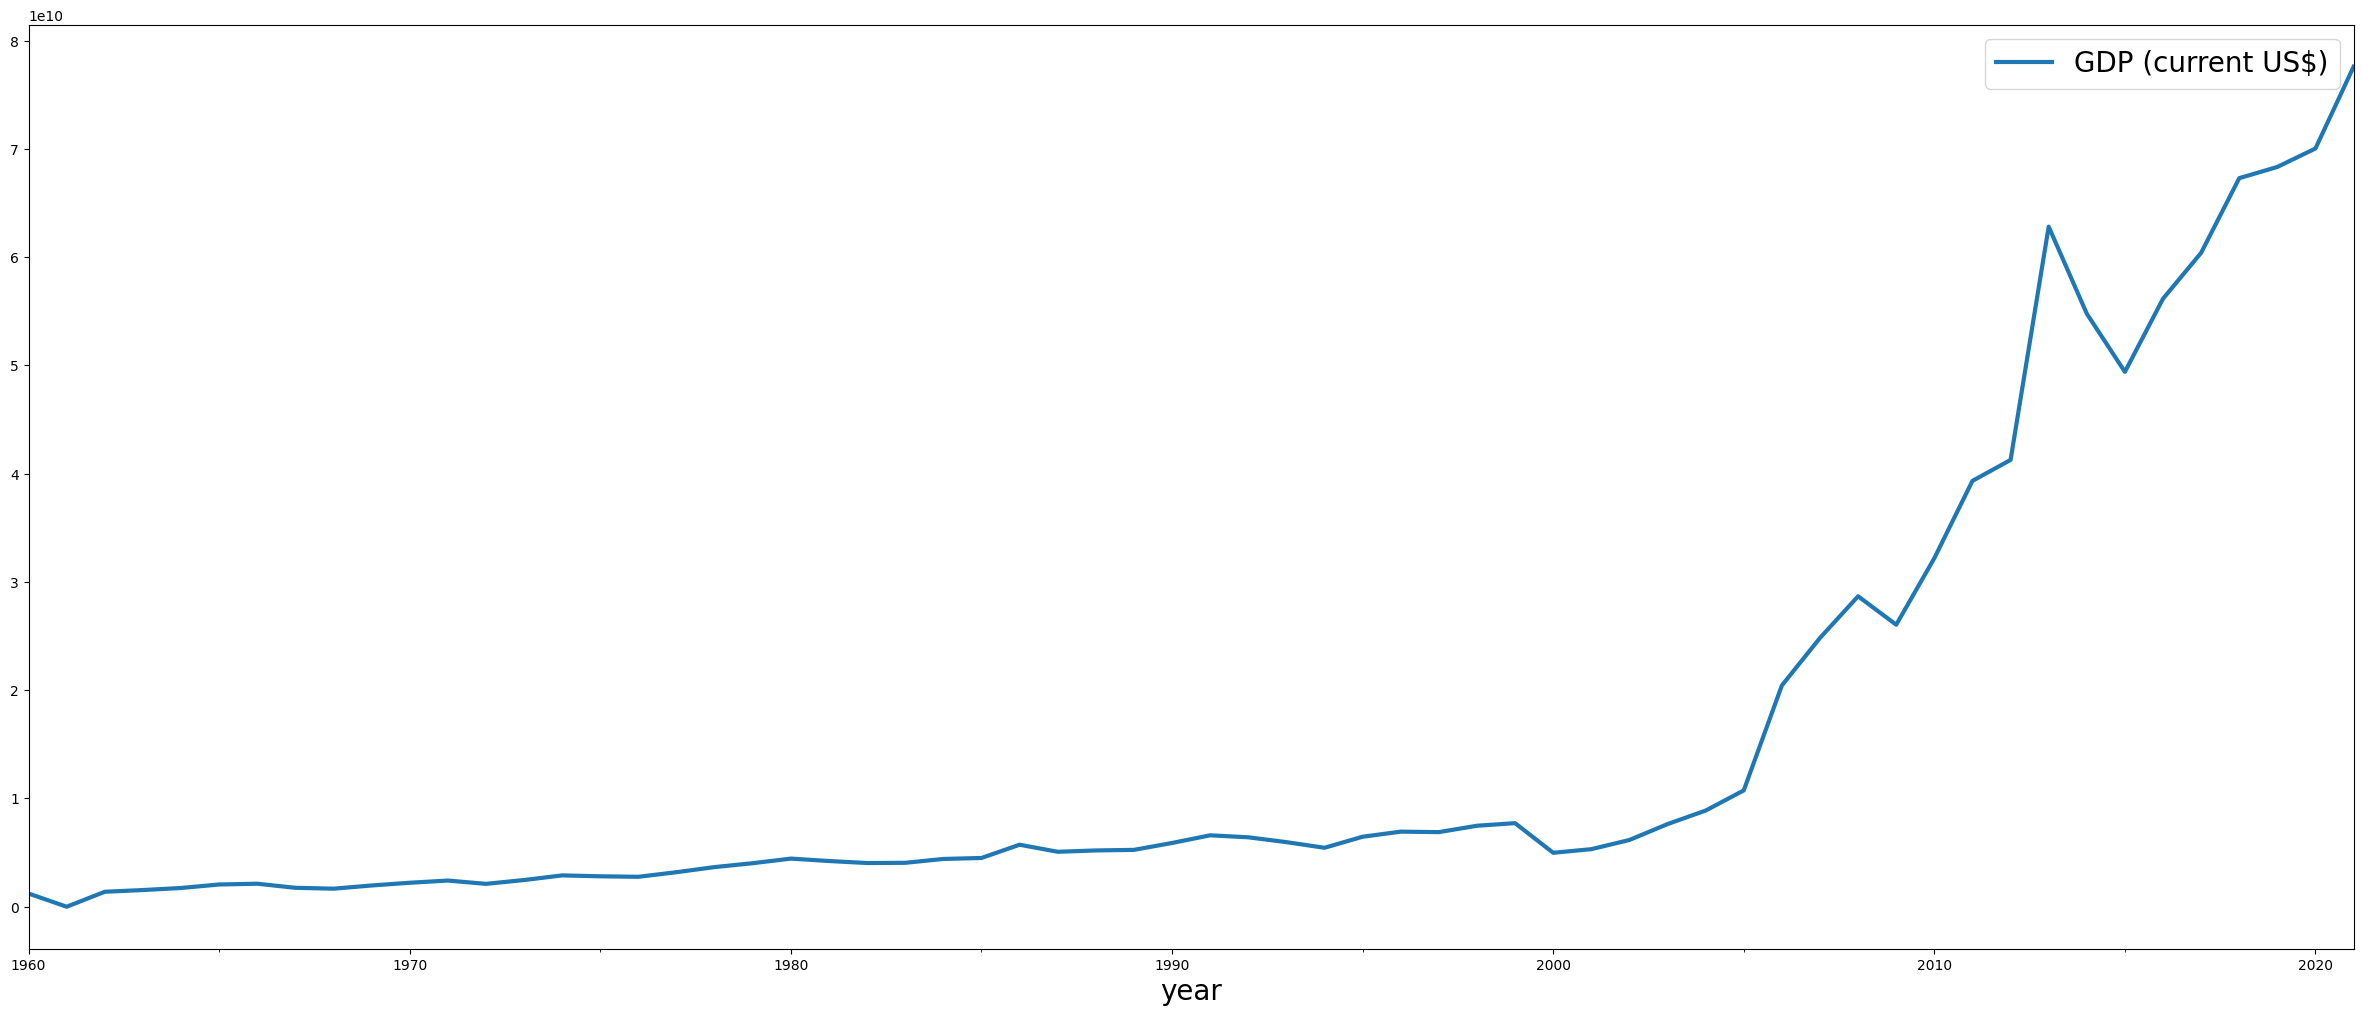

In [100]:
%matplotlib inline

plt.rcParams["figure.figsize"] = 30, 12
plt.rcParams["font.size"] = 20
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10
plt.rcParams["lines.linewidth"] = 3

df.plot()
plt.show()

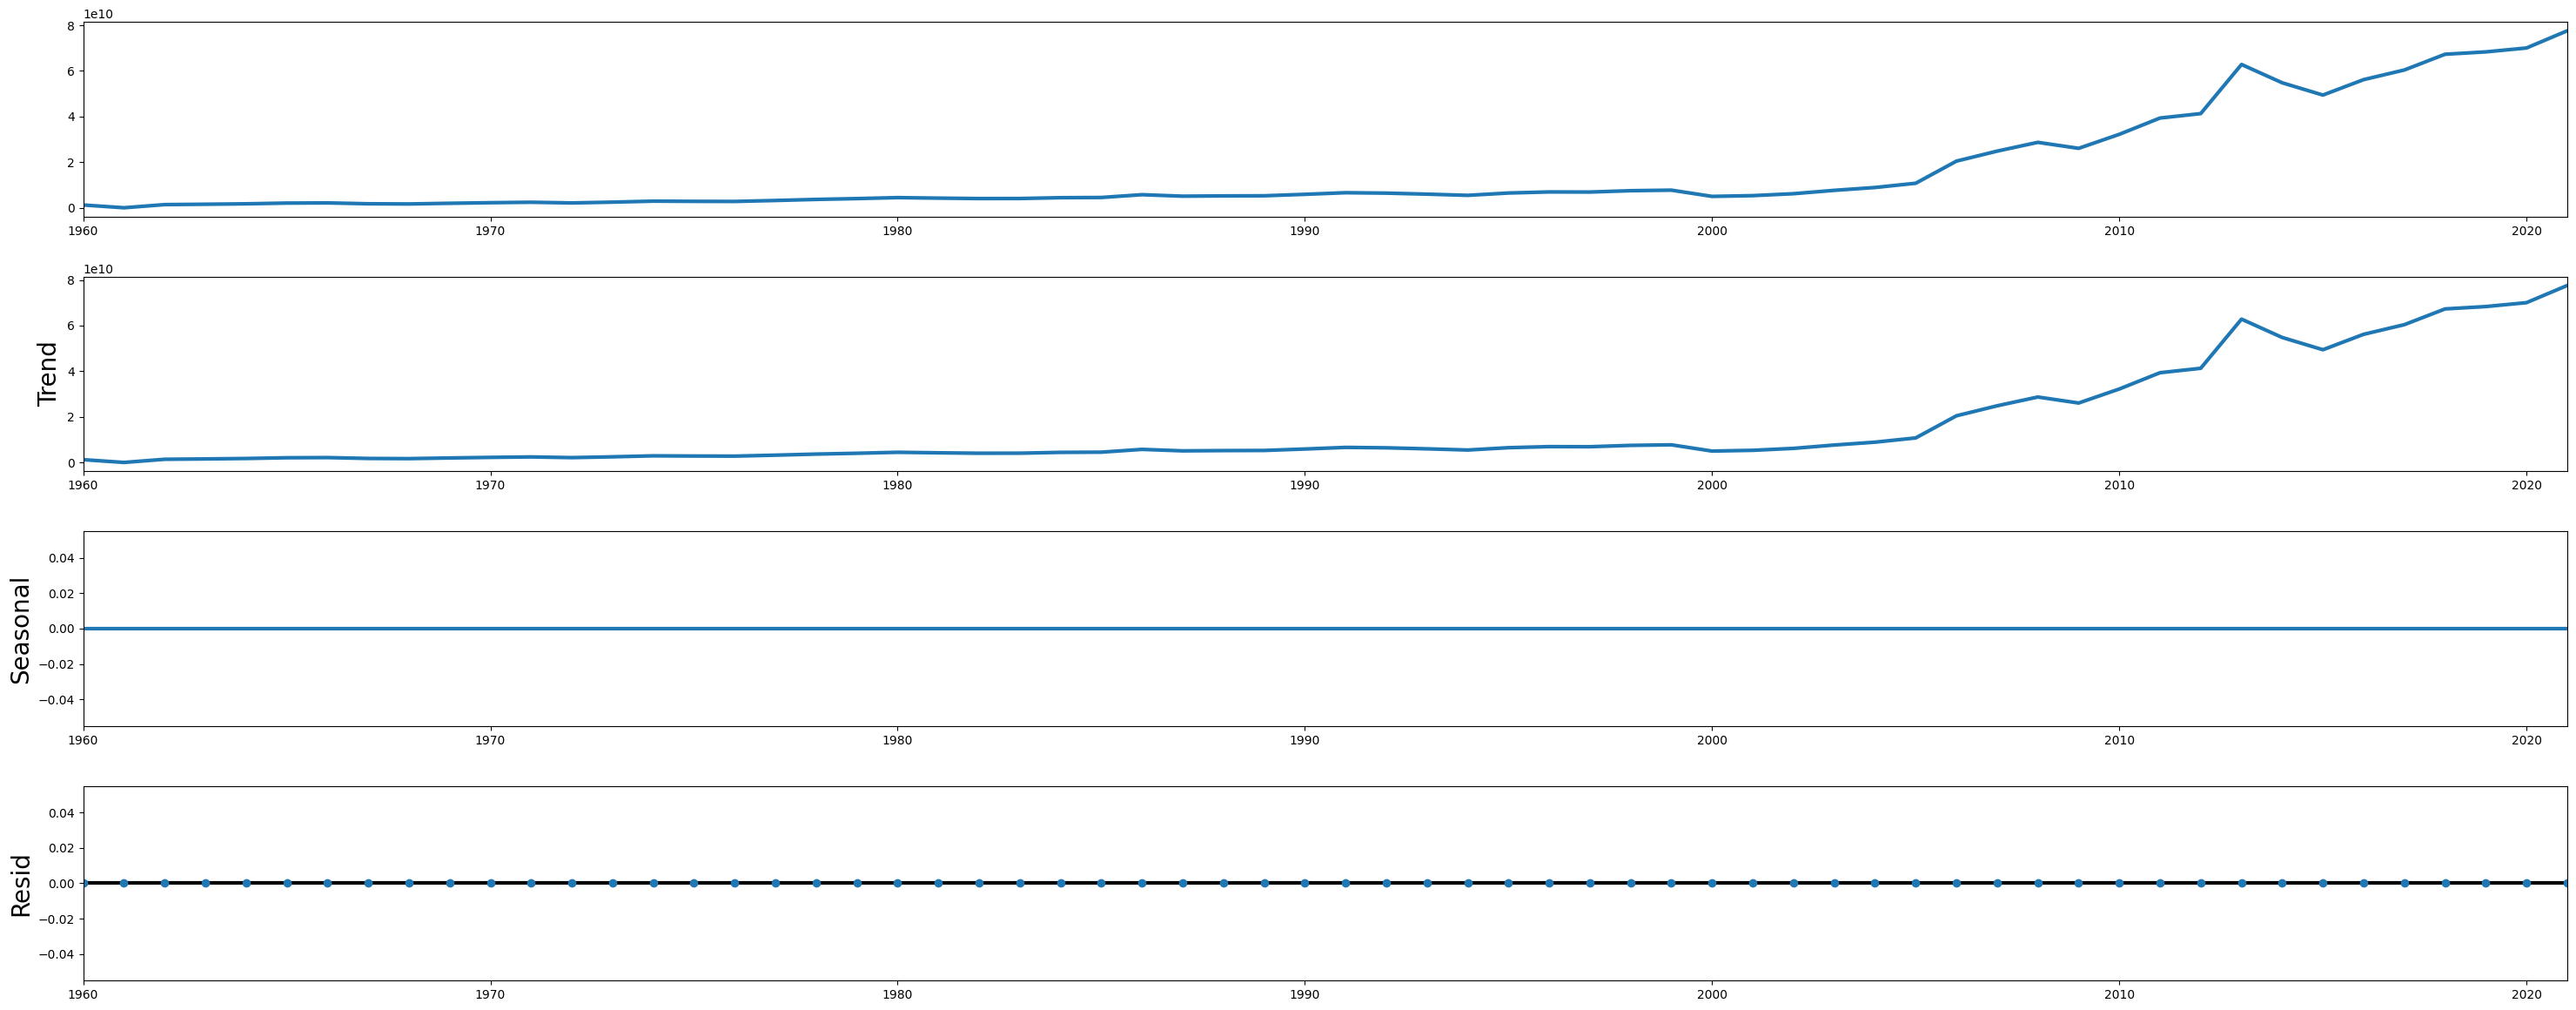

In [101]:
decomposition = seasonal_decompose(df, model='additive') 
decomposition.plot()
plt.show()

<ul>Из полученных графиков можно сделать следующие выводы:
<li>тренд просматривается, хотя его характер достаточно сильно меняется после 2000 года;</li>
<li>сезонность отсутствует, что вполне объяснимо, т.к. данные идут за год без наличия более мелких периодов;</li>
<li>остатки практически отсутствуют.</li>
</ul>

Разделим выборку на обучающую и тестовую. Отнесем к тестовой выборке данные за последние 3 года.

In [102]:
train_df = df.iloc[:-3]
test_df = df.iloc[-3:]
train_df.shape, test_df.shape
display(train_df.tail())
display(test_df.head())

,GDP (current US$)
year,
2014-01-01,5.478285e+10
2015-01-01,4.940657e+10
2016-01-01,5.616517e+10
2017-01-01,6.040638e+10
2018-01-01,6.729928e+10


,GDP (current US$)
year,
2019-01-01,6.833754e+10
2020-01-01,7.004320e+10
2021-01-01,7.759428e+10


Построим график временного ряда, а рядом &mdash; график скользящего среднего.<br />Рассммотрим варианты ширины окна 2, 4 и 6.

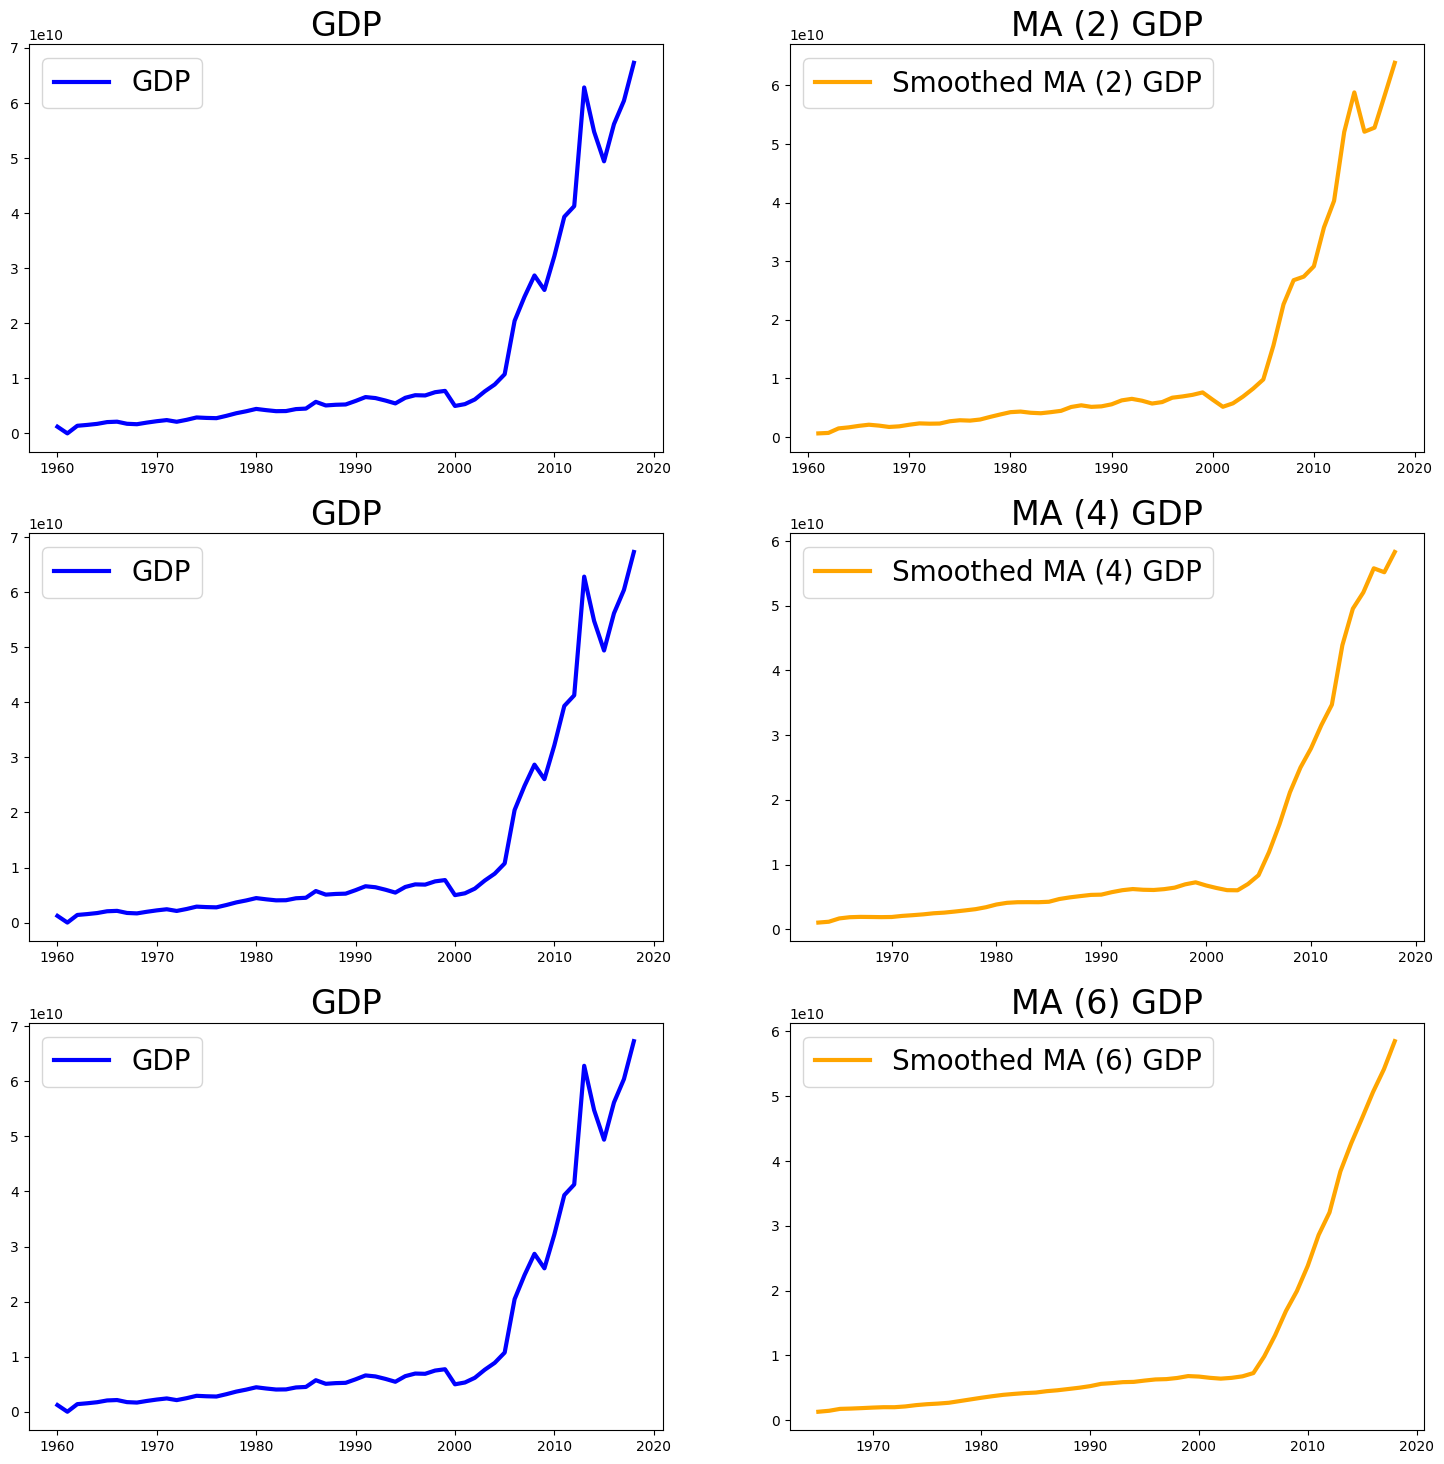

In [103]:
plt.rcParams["figure.figsize"] = 18, 18

fig, ax = plt.subplots(3, 2)


ax[0, 0].plot(train_df['GDP (current US$)'], color="blue", label="GDP")
ax[0, 0].set_title("GDP", size=24)
ax[0, 0].legend()

ax[0, 1].plot(
    train_df['GDP (current US$)'].rolling(window=2).mean(),
    color="orange",
    label="Smoothed MA (2) GDP",
)

ax[0, 1].set_title("MA (2) GDP", size=24)
ax[0, 1].legend()



ax[1, 0].plot(train_df['GDP (current US$)'], color="blue", label="GDP")
ax[1, 0].set_title("GDP", size=24)
ax[1, 0].legend()

ax[1, 1].plot(
    train_df['GDP (current US$)'].rolling(window=4).mean(),
    color="orange",
    label="Smoothed MA (4) GDP",
)

ax[1, 1].set_title("MA (4) GDP", size=24)
ax[1, 1].legend()

ax[2, 0].plot(train_df['GDP (current US$)'], color="blue", label="GDP")
ax[2, 0].set_title("GDP", size=24)
ax[2, 0].legend()

ax[2, 1].plot(
    train_df['GDP (current US$)'].rolling(window=6).mean(),
    color="orange",
    label="Smoothed MA (6) GDP",
)

ax[2, 1].set_title("MA (6) GDP", size=24)
ax[2, 1].legend()

plt.show()

Из графиков исходного временного ряда и скользящего среднего можно заметить, что при ширине окна = 2 тренд виден отчетливо.<br />
При ширине окна = 4 идет довольно сильное сглаживание, тренд виден отчетливо.<br />
При ширине окна = 6 сглаживание скрывает все особенности, но оставляет тренд.

С помощью теста Дики-Фуллера оценим стационарность временного ряда.

In [104]:
def stat_test(df):
    test = sm.tsa.adfuller(df)
    print ('adf: ', test[0] )
    print ('p-value: ', test[1])
    print('Critical values: ', test[4])
    if test[0]> test[4]['5%']: 
        print ('есть единичные корни, ряд не стационарен')
    else:
        print ('единичных корней нет, ряд стационарен')

stat_test(train_df)

adf:  0.6529066974885349
p-value:  0.9888496277665572
Critical values:  {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}
есть единичные корни, ряд не стационарен


In [105]:
otg_diff = train_df.diff(periods=1).dropna()
stat_test(otg_diff)

adf:  -1.6702483038320777
p-value:  0.446502932971389
Critical values:  {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}
есть единичные корни, ряд не стационарен


In [106]:
otg_diff = otg_diff.diff(periods=1).dropna()
stat_test(otg_diff)

adf:  -2.6408690561284898
p-value:  0.08484116917837664
Critical values:  {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}
есть единичные корни, ряд не стационарен


In [107]:
otg_diff = otg_diff.diff(periods=1).dropna()
stat_test(otg_diff)

adf:  -4.779623784828512
p-value:  5.9483276402254376e-05
Critical values:  {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}
единичных корней нет, ряд стационарен


Для данного ряда пришлось трижды проводить дифференцирование, прежде чем ряд стал стационарным. Таким образом, для работы необходимо выбирать модель ARIMA с параметором d = 3.

In [108]:
df_diff=otg_diff.copy()

c:\python\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


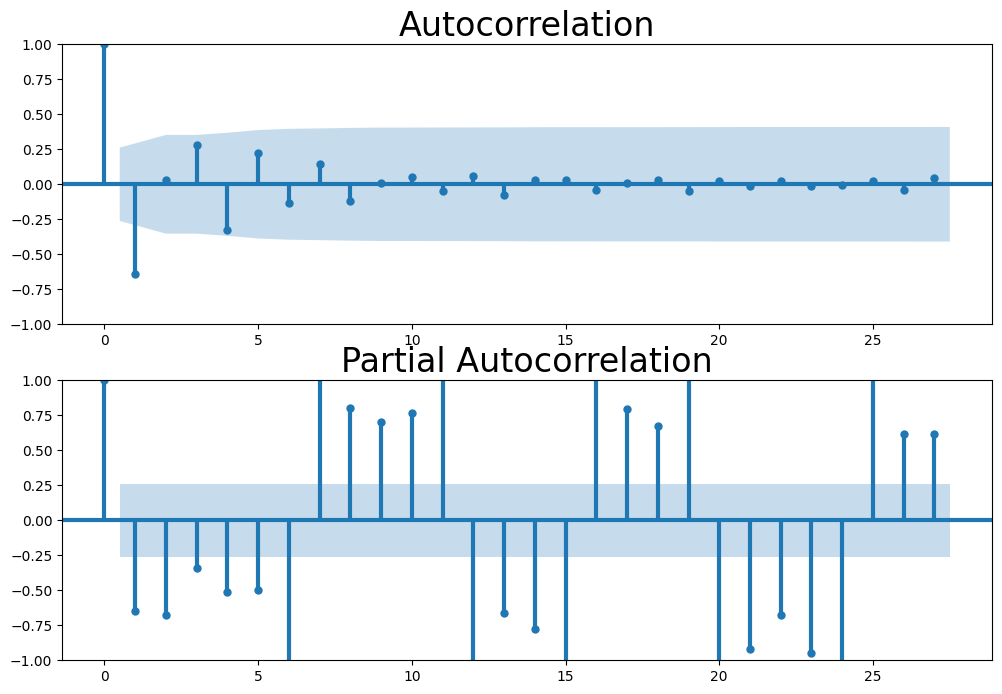

In [109]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_diff.values.squeeze(), lags=27, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_diff, lags=27, ax=ax2)

Необходимые параметры p и q выбираются на основании графиков автокорреляции и частичной автокорреляции. Исходя из видов графиков установим следующие значения для коэффициентов:
<ul>
<li>p = 2 - на основании графика частичной автокорреляции;</li>
<li>q = 1 - для определения этого параметра используем график автокорреляции;</li>
<li>d = 3 - нам пришлось трижды дифференцировать ряд для достижения стационарности.</li>
</ul>

In [110]:
p = 2
q = 1
d = 3

In [111]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train_df['GDP (current US$)'].dropna(), order=(p, d, q))
arima_model_fit = arima_model.fit()
arima_model_fit.summary()

c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      GDP (current US$)   No. Observations:                   59
Model:                 ARIMA(2, 3, 1)   Log Likelihood               -1325.615
Date:                Thu, 21 Sep 2023   AIC                           2659.231
Time:                        08:20:11   BIC                           2667.332
Sample:                    01-01-1960   HQIC                          2662.372
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7427      0.129     -5.765      0.000      -0.995      -0.490
ar.L2         -0.4577      0.223     -2.055      0.040      -0.894      -0.021
ma.L1         -0.9730      0.110     -8.808      0.000      -1.189      -0.756
sigma2      3.138e+19   5.16e-22   6.08e+40      0.000    3.14e+19    3.14e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):               161.83
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):             392.62   Skew:                            -0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.26e+56. Standard errors may be unstable.
"""

Попробуем подобрать необходимые нам параметры, используя библиотеку pmdarima.

In [112]:
import pmdarima as pm

smodel = pm.auto_arima(
    train_df,
    start_p=0,
    d=3,
    start_q=0,
    max_p=4,
    max_q=5,
    D=3,
    start_P=0,
    m=1,
    test="adf",
    error_action="ignore",
    trace=True,
)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=2734.956, Time=0.01 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=2707.192, Time=0.01 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=2682.371, Time=0.06 sec
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=2670.910, Time=0.04 sec
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=2659.231, Time=0.04 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=2679.050, Time=0.02 sec
 ARIMA(3,3,1)(0,0,0)[0]             : AIC=2660.791, Time=0.05 sec
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(3,3,0)(0,0,0)[0]             : AIC=2676.883, Time=0.03 sec
 ARIMA(3,3,2)(0,0,0)[0]             : AIC=inf, Time=0.30 sec
 ARIMA(2,3,1)(0,0,0)[0] intercept   : AIC=2666.241, Time=0.04 sec

Best model:  ARIMA(2,3,1)(0,0,0)[0]          
Total fit time: 0.862 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   59
Model:               SARIMAX(2, 3, 1)   Log Likelihood               -1325.615
Date:                Thu, 21 Sep 2023   AIC                           2659.231
Time:                        08:20:12   BIC                           2667.332
Sample:                    01-01-1960   HQIC                          2662.372
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7427      0.129     -5.765      0.000      -0.995      -0.490
ar.L2         -0.4577      0.223     -2.055      0.040      -0.894      -0.021
ma.L1         -0.9730      0.110     -8.808      0.000      -1.189      -0.756
sigma2      3.138e+19   5.16e-22   6.08e+40      0.000    3.14e+19    3.14e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):               161.83
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):             392.62   Skew:                            -0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.26e+56. Standard errors may be unstable.
"""

При установленных жёстких параметров для p = 2, q = 1 и d = 3 AIC = 2659.231<br />
Поиск оптимальных параметров вернул те же значения для p и q равными p = 2, q = 1. Значение AIC = 2659.231<br />
Модель с оптимальными параметрами p = 2, q = 1 и d = 3 уже была построена.

In [113]:
arima_model = ARIMA(train_df['GDP (current US$)'].dropna(), order=(2, 3, 1))
arima_model_fit = arima_model.fit()
arima_model_fit.summary()

c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      GDP (current US$)   No. Observations:                   59
Model:                 ARIMA(2, 3, 1)   Log Likelihood               -1325.615
Date:                Thu, 21 Sep 2023   AIC                           2659.231
Time:                        08:20:12   BIC                           2667.332
Sample:                    01-01-1960   HQIC                          2662.372
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7427      0.129     -5.765      0.000      -0.995      -0.490
ar.L2         -0.4577      0.223     -2.055      0.040      -0.894      -0.021
ma.L1         -0.9730      0.110     -8.808      0.000      -1.189      -0.756
sigma2      3.138e+19   5.16e-22   6.08e+40      0.000    3.14e+19    3.14e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):               161.83
Prob(Q):                              0.64   Prob(JB):                         0.00
Heteroskedasticity (H):             392.62   Skew:                            -0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.26e+56. Standard errors may be unstable.
"""

Для модели с наилучшими параметрами сделаем предсказание для тестовой выборки.

,model_preds,GDP (current US$)
year,,
2019-01-01,7.368591e+10,6.833754e+10
2020-01-01,7.954567e+10,7.004320e+10
2021-01-01,8.633936e+10,7.759428e+10


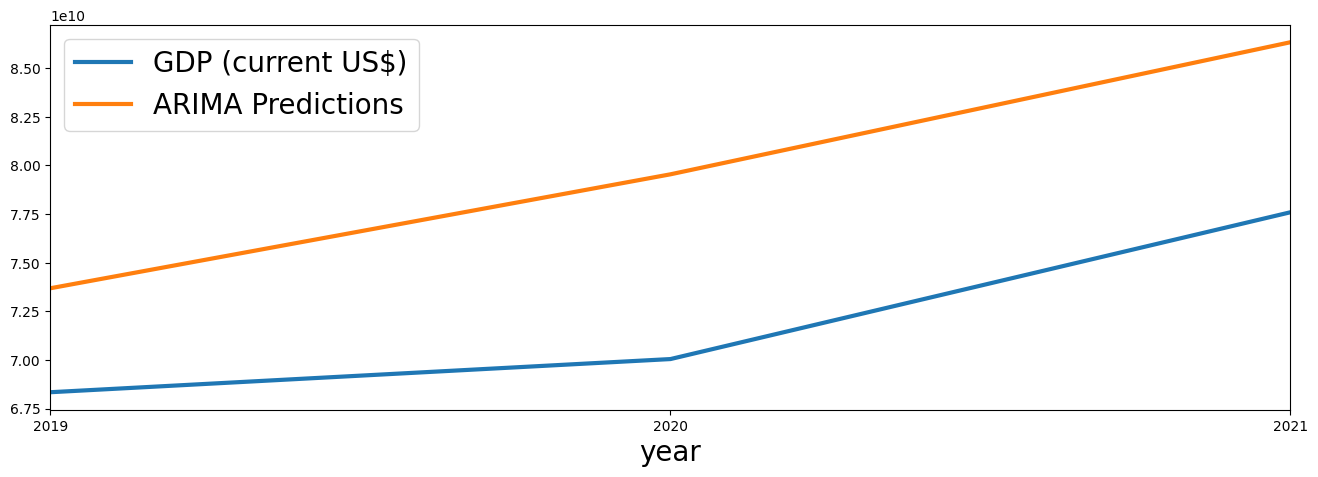

In [114]:
arima_pred = arima_model_fit.predict(start = len(train_df), end = len(df)-1, typ="levels").rename("ARIMA Predictions")

pred_df = pd.DataFrame(index=df.index)

pred_df["model_preds"] = arima_model_fit.predict(
    start=test_df.index[0], end=test_df.index[-1]
)


pred_df['GDP (current US$)'] = df['GDP (current US$)']
display(pred_df.iloc[-3:])

test_df['GDP (current US$)'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

Крупным планом наша модель выглядит не очень качественной.

In [115]:
forecast = arima_model_fit.get_forecast(len(test_df.index))
forecast_df = forecast.conf_int(alpha=0.05)  # Confidence level of 95%



pred_df.at[test_df.index, "model_preds_lower"] = forecast_df["lower GDP (current US$)"]
pred_df.at[test_df.index, "model_preds_upper"] = forecast_df["upper GDP (current US$)"]

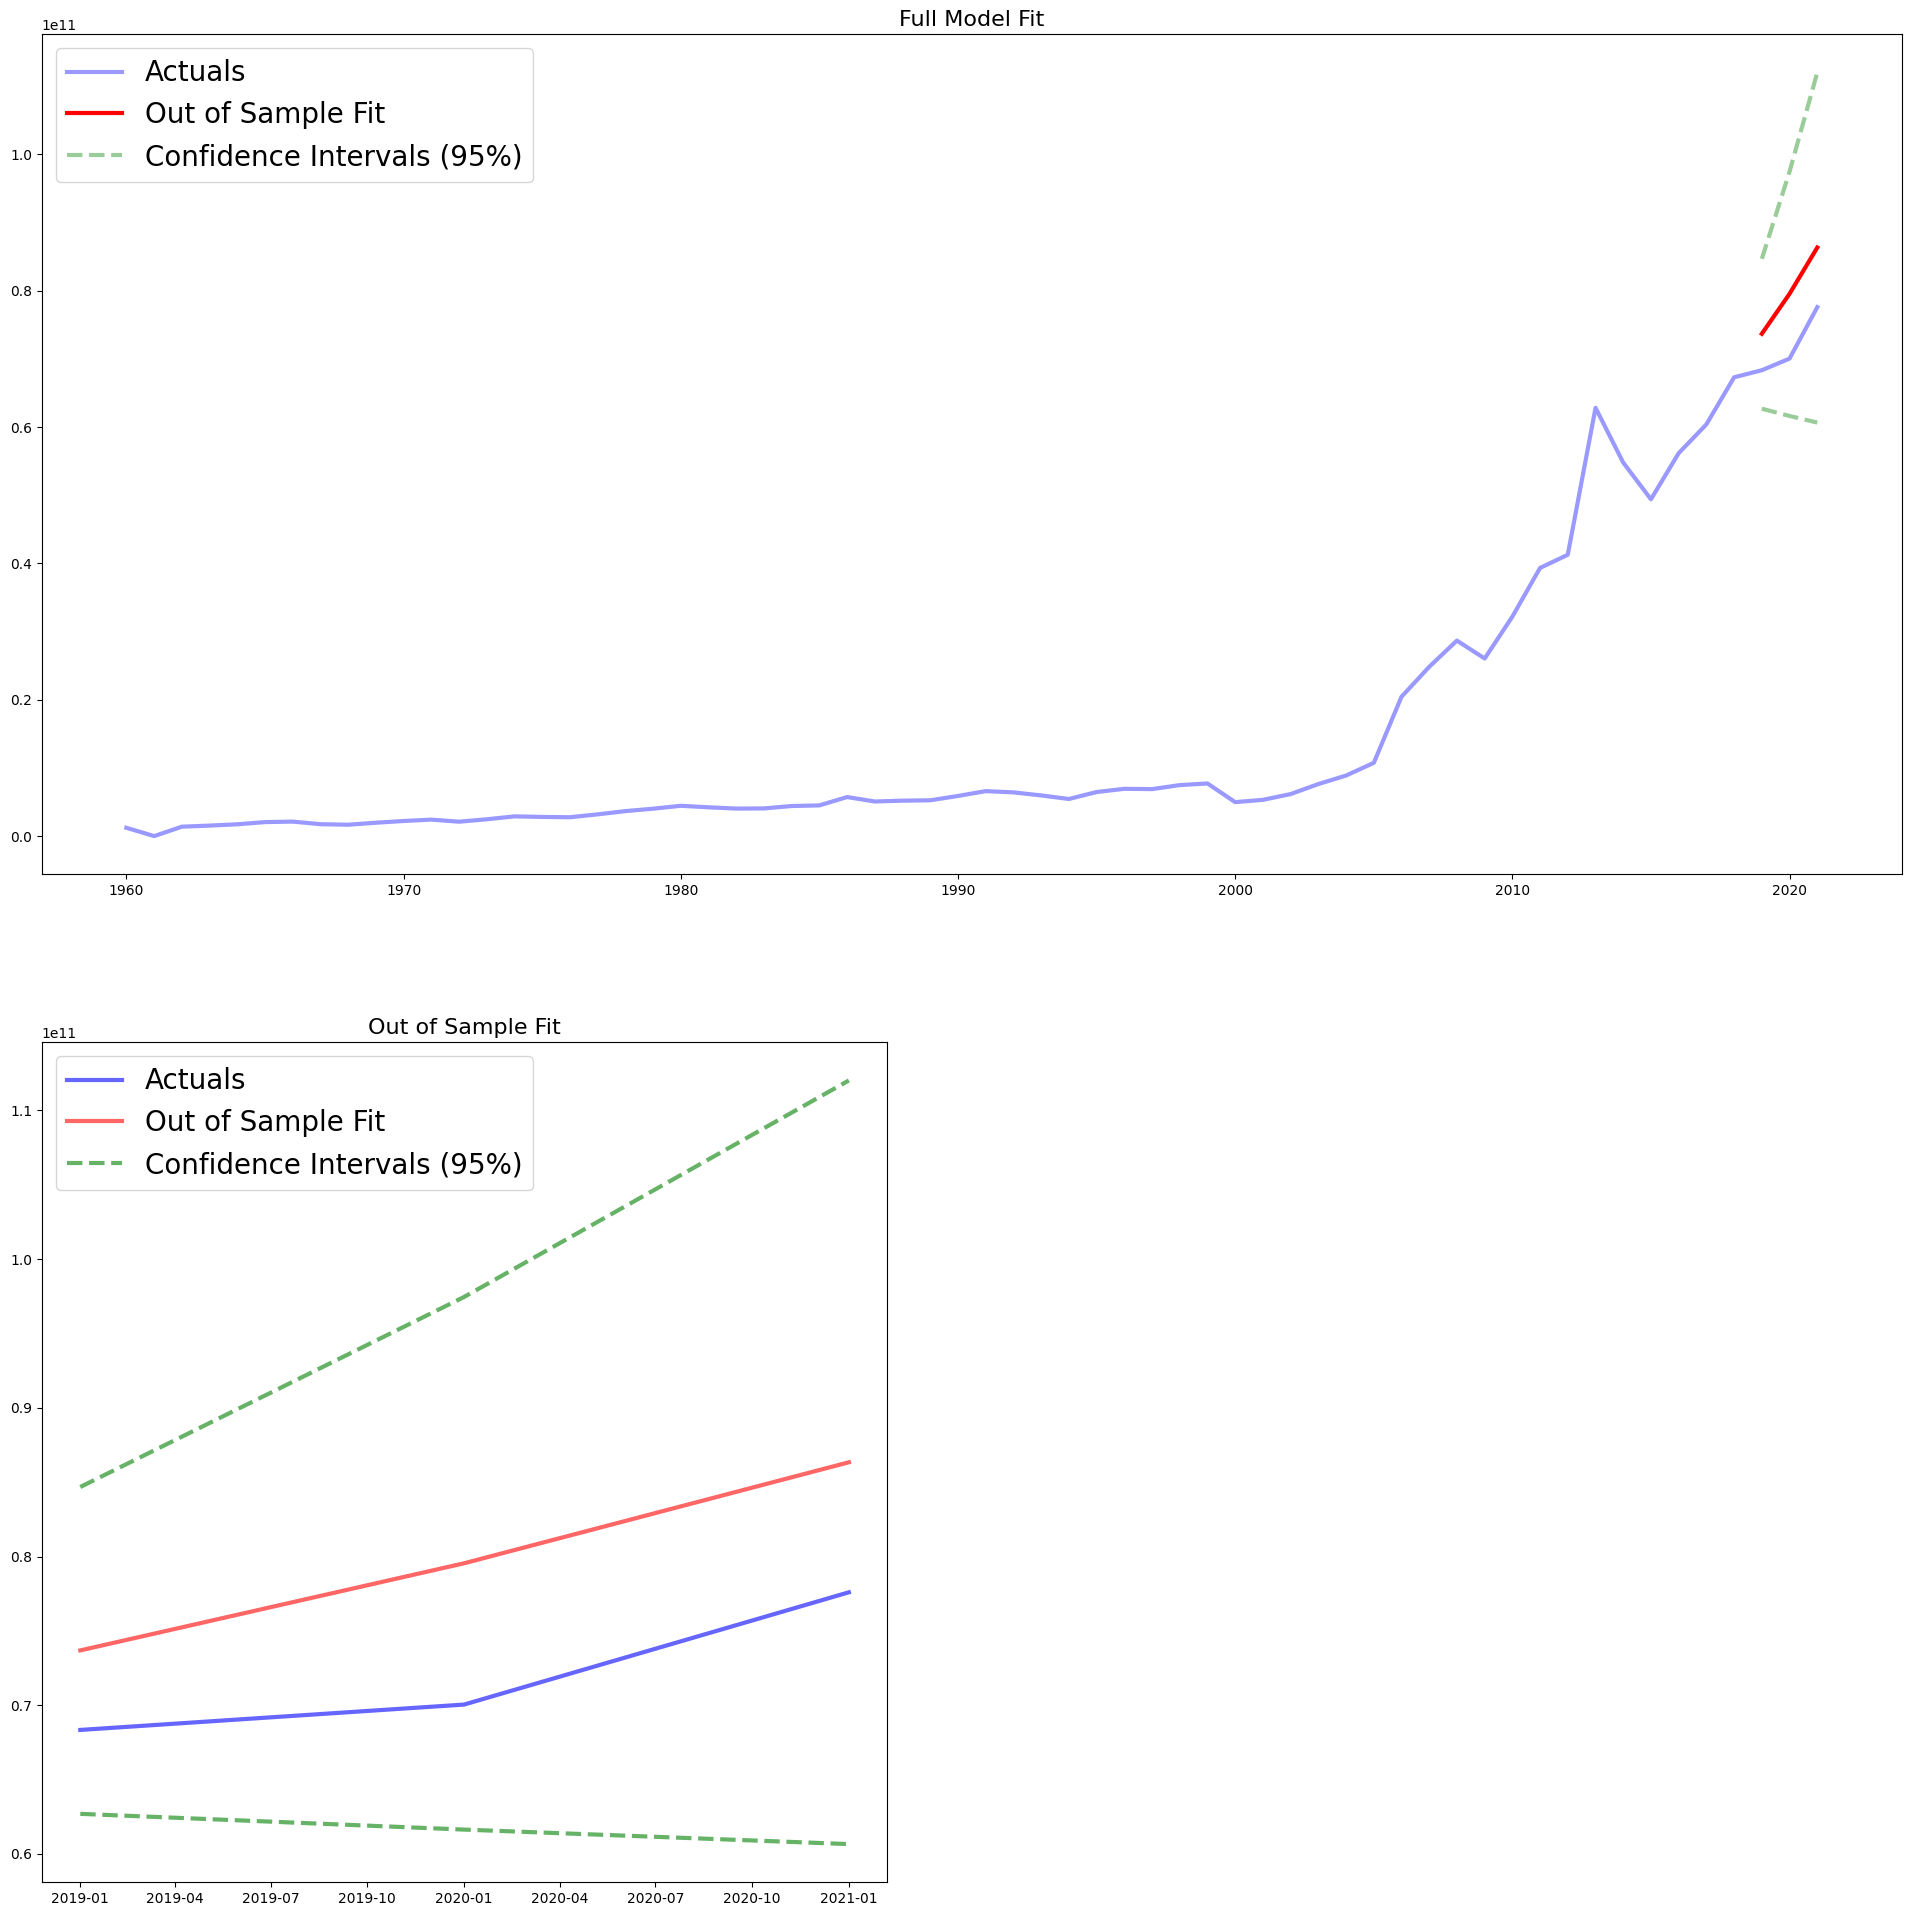

In [116]:
plt.rcParams["figure.figsize"] = 24, 24

ax = plt.subplot(2, 1, 1)
ax.plot(pred_df['GDP (current US$)'], color="blue", label="Actuals", alpha=0.4)

ax.plot(
    pred_df.loc[test_df.index]["model_preds"],
    color="red",
    linestyle="-",
    label="Out of Sample Fit",
)

ax.plot(
    pred_df.loc[test_df.index]["model_preds_lower"],
    color="green",
    linestyle="--",
    label="Confidence Intervals (95%)",
    alpha=0.4,
)

ax.plot(
    pred_df.loc[test_df.index]["model_preds_upper"],
    color="green",
    linestyle="--",
    alpha=0.4,
)

plt.title("Full Model Fit", size=16)
plt.legend()

ax1 = plt.subplot(2, 2, 3)

ax1.plot(
    pred_df.loc[test_df.index]['GDP (current US$)'], color="blue", label="Actuals", alpha=0.6
)

ax1.plot(
    pred_df.loc[test_df.index]["model_preds"],
    color="red",
    linestyle="-",
    label="Out of Sample Fit",
    alpha=0.6,
)

ax1.plot(
    pred_df.loc[test_df.index]["model_preds_lower"],
    color="green",
    linestyle="--",
    label="Confidence Intervals (95%)",
    alpha=0.6,
)

ax1.plot(
    pred_df.loc[test_df.index]["model_preds_upper"],
    color="green",
    linestyle="--",
    alpha=0.6,
)

plt.title("Out of Sample Fit", size=16)
ax1.legend()


plt.show()

По итогам моделирования на данном этапе можно заметить, что хоть модель и не кажется очень точной, но предсказанные значения вполне попадают внутрь 95% доверительного интервала.<br />В качестве оправдания нашей модели можно заметить, что исходные данные содержат значение, сильно выбивающееся из общей картины (данные за 2013 год). Т.к. этот "выброс" расположен близко к границе между тренировочными и тестовыми данными, то он оказывает существенное влияние на прогноз.

Проведем проверку на наличие пропущенных дат.

In [117]:
df = df_copy.copy()
display(df.asfreq(freq='AS'))

,GDP (current US$)
year,
1960-01-01,1.217087e+09
1961-01-01,0.000000e+00
1962-01-01,1.382353e+09
1963-01-01,1.540616e+09
1964-01-01,1.731092e+09
...,...
2017-01-01,6.040638e+10
2018-01-01,6.729928e+10
2019-01-01,6.833754e+10


Пропущенных дат нет.<br />
Сделаем проверку на наличие нулевых значений.

In [118]:
display(df.isna().sum())
display(df[df['GDP (current US$)'] < 0.09])

GDP (current US$)    0
dtype: int64

,GDP (current US$)
year,
1961-01-01,0.0


Имеется один год, за который значение ВВП равно нулю. Заменим его на NaN, после чего выполним интерполяцию.

In [119]:
import numpy as np

df['GDP (current US$)'] = df['GDP (current US$)'].apply(lambda x: np.nan if x==0 else x)
df['GDP (current US$)'] = df['GDP (current US$)'].interpolate(method='linear')
display(df.head())

,GDP (current US$)
year,
1960-01-01,1.217087e+09
1961-01-01,1.299720e+09
1962-01-01,1.382353e+09
1963-01-01,1.540616e+09
1964-01-01,1.731092e+09


Мы выполнили интерполяцию и теперь попробуем построить модель с учетом проведенной операции.

(62, 1)

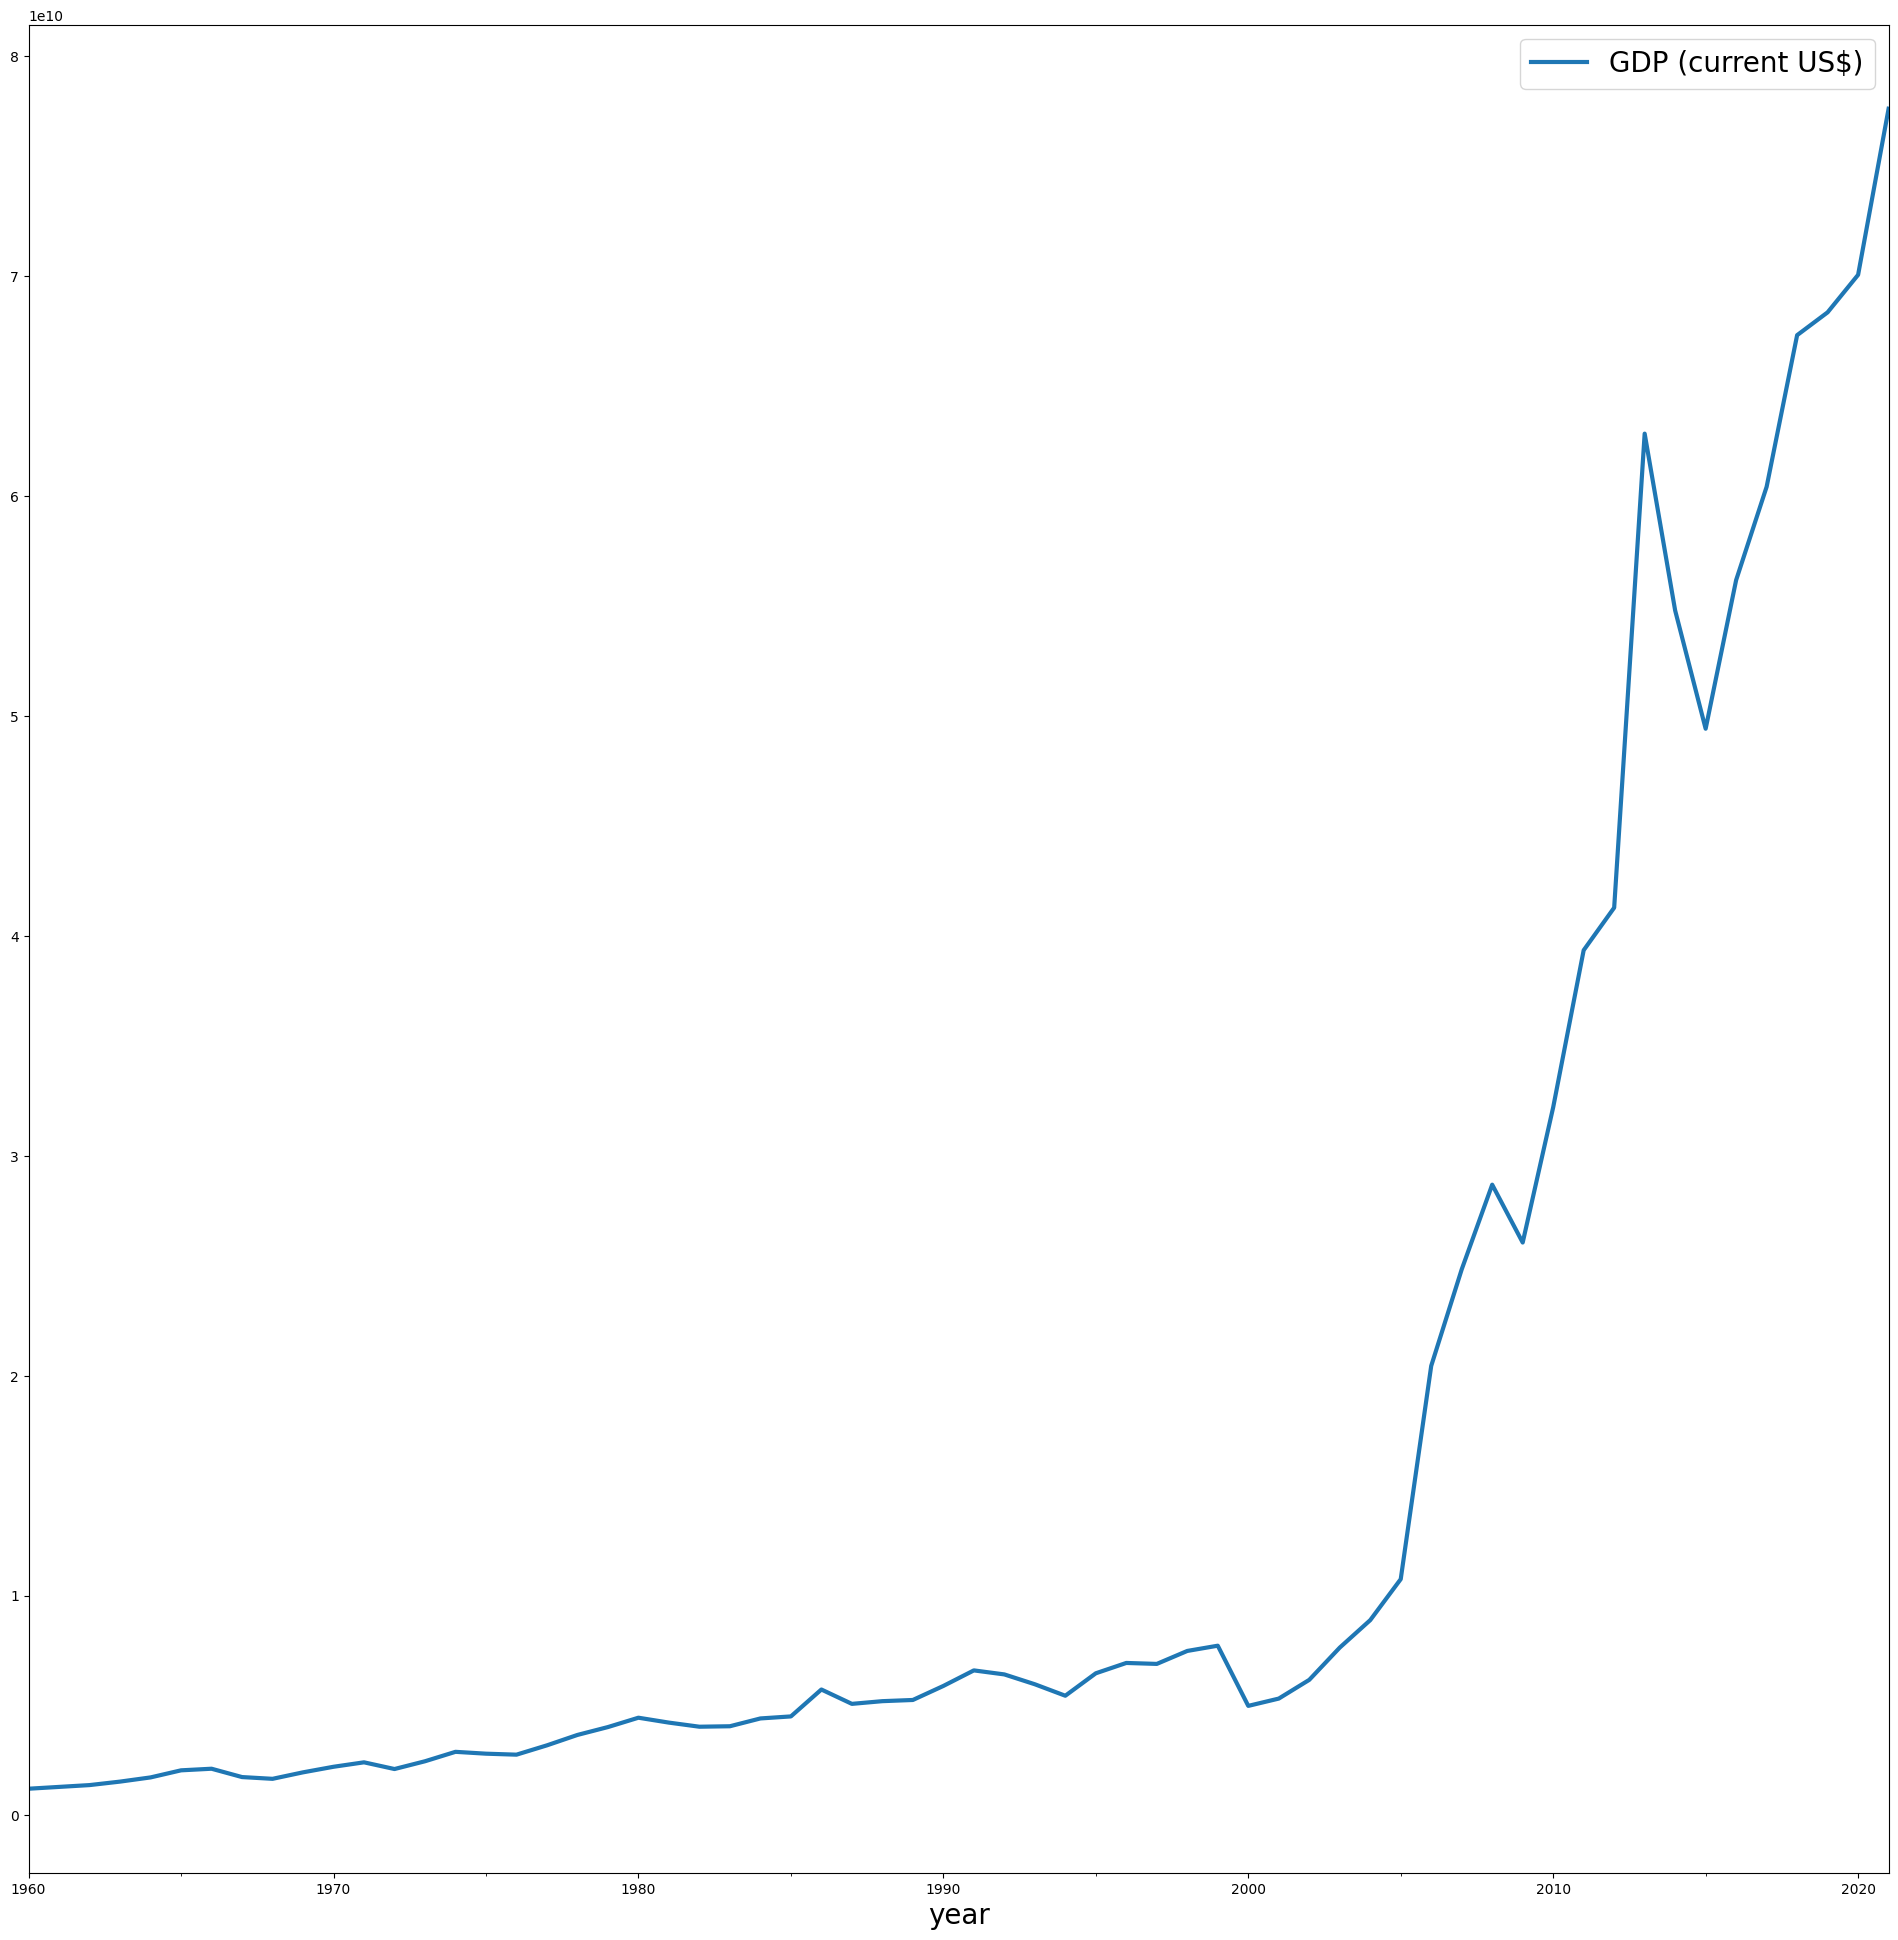

In [120]:
display(df.shape)
df.plot()
plt.show()

Разделим снова выборку на тренировочную и тестовую. К тестовой отнесем данные за последние три года.

In [121]:
train_df = df.iloc[:-3]
test_df = df.iloc[-3:]
train_df.shape, test_df.shape
display(train_df.tail())
display(test_df.head())

,GDP (current US$)
year,
2014-01-01,5.478285e+10
2015-01-01,4.940657e+10
2016-01-01,5.616517e+10
2017-01-01,6.040638e+10
2018-01-01,6.729928e+10


,GDP (current US$)
year,
2019-01-01,6.833754e+10
2020-01-01,7.004320e+10
2021-01-01,7.759428e+10


In [122]:
otg_diff = train_df.diff(periods=1).dropna()
stat_test(otg_diff)

adf:  -1.8255652246435998
p-value:  0.36784515276563423
Critical values:  {'1%': -3.568485864, '5%': -2.92135992, '10%': -2.5986616}
есть единичные корни, ряд не стационарен


In [123]:
otg_diff = otg_diff.diff(periods=1).dropna()
stat_test(otg_diff)

adf:  -2.634634746007842
p-value:  0.0860481372219768
Critical values:  {'1%': -3.5714715250448363, '5%': -2.922629480573571, '10%': -2.5993358475635153}
есть единичные корни, ряд не стационарен


In [124]:
otg_diff = otg_diff.diff(periods=1).dropna()
stat_test(otg_diff)

adf:  -4.825603687304014
p-value:  4.857318076800112e-05
Critical values:  {'1%': -3.5745892596209488, '5%': -2.9239543084490744, '10%': -2.6000391840277777}
единичных корней нет, ряд стационарен


In [125]:
df_diff=otg_diff.copy()

c:\python\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


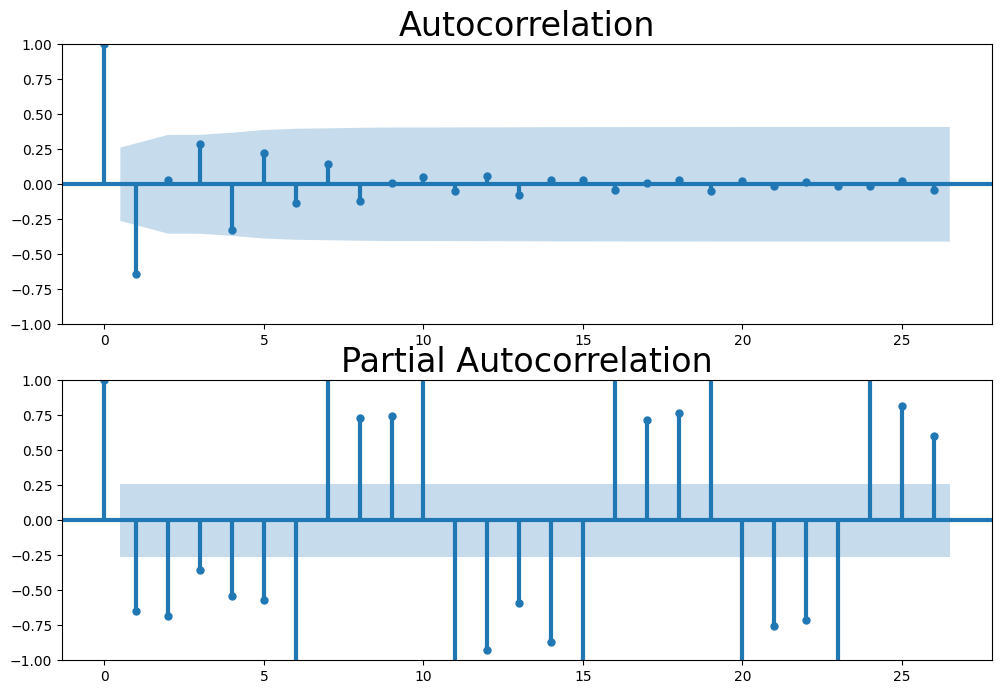

In [126]:
%matplotlib inline

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_diff.values.squeeze(), lags=26, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_diff, lags=26, ax=ax2)

Параметры для построения модели не изменились.

In [127]:
p = 4
q = 1
d = 3

In [128]:
arima_model = ARIMA(train_df['GDP (current US$)'].dropna(), order=(p, d, q))
arima_model_fit = arima_model.fit()
arima_model_fit.summary()

c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-in

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:      GDP (current US$)   No. Observations:                   59
Model:                 ARIMA(4, 3, 1)   Log Likelihood               -1317.908
Date:                Thu, 21 Sep 2023   AIC                           2647.817
Time:                        08:20:14   BIC                           2659.969
Sample:                    01-01-1960   HQIC                          2652.528
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9263      0.156     -5.952      0.000      -1.231      -0.621
ar.L2         -0.9275      0.352     -2.633      0.008      -1.618      -0.237
ar.L3         -0.6500      0.372     -1.749      0.080      -1.378       0.078
ar.L4         -0.5525      0.315     -1.752      0.080      -1.171       0.066
ma.L1         -0.9667      0.160     -6.044      0.000      -1.280      -0.653
sigma2      2.365e+19   8.94e-21   2.64e+39      0.000    2.36e+19    2.36e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):               245.19
Prob(Q):                              0.47   Prob(JB):                         0.00
Heteroskedasticity (H):             524.14   Skew:                             1.03
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.42e+55. Standard errors may be unstable.
"""

In [129]:
smodel = pm.auto_arima(
    train_df,
    start_p=0,
    d=3,
    start_q=0,
    max_p=6,
    max_q=5,
    D=3,
    start_P=0,
    m=1,
    test="adf",
    error_action="ignore",
    trace=True,
)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(0,3,0)(0,0,0)[0]             : AIC=2734.778, Time=0.01 sec
 ARIMA(1,3,0)(0,0,0)[0]             : AIC=2707.155, Time=0.01 sec
 ARIMA(0,3,1)(0,0,0)[0]             : AIC=2682.372, Time=0.02 sec
 ARIMA(1,3,1)(0,0,0)[0]             : AIC=2670.933, Time=0.03 sec
 ARIMA(2,3,1)(0,0,0)[0]             : AIC=2659.226, Time=0.04 sec
 ARIMA(2,3,0)(0,0,0)[0]             : AIC=2678.992, Time=0.03 sec
 ARIMA(3,3,1)(0,0,0)[0]             : AIC=2660.791, Time=0.07 sec
 ARIMA(2,3,2)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(1,3,2)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(3,3,0)(0,0,0)[0]             : AIC=2676.882, Time=0.02 sec
 ARIMA(3,3,2)(0,0,0)[0]             : AIC=inf, Time=0.17 sec
 ARIMA(2,3,1)(0,0,0)[0] intercept   : AIC=2665.990, Time=0.03 sec

Best model:  ARIMA(2,3,1)(0,0,0)[0]          
Total fit time: 0.679 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   59
Model:               SARIMAX(2, 3, 1)   Log Likelihood               -1325.613
Date:                Thu, 21 Sep 2023   AIC                           2659.226
Time:                        08:20:14   BIC                           2667.328
Sample:                    01-01-1960   HQIC                          2662.367
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7420      0.129     -5.756      0.000      -0.995      -0.489
ar.L2         -0.4585      0.223     -2.056      0.040      -0.895      -0.022
ma.L1         -0.9729      0.110     -8.806      0.000      -1.189      -0.756
sigma2      3.139e+19   4.77e-22   6.58e+40      0.000    3.14e+19    3.14e+19
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):               163.47
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):             440.85   Skew:                            -0.73
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.24
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.59e+57. Standard errors may be unstable.
"""

AIC изменился, но это почти косметическое изменение, было AIC = 2659.231, стало AIC = 2659.226<br />
Оптимальные параметры тоже остались прежними p = 2, q = 1 и d = 3.<br />
Данный результат не является неожиданным, т.к. изменению подверглось всего одно значение за 1961 год.

,model_preds,GDP (current US$)
year,,
2019-01-01,6.482870e+10,6.833754e+10
2020-01-01,6.362143e+10,7.004320e+10
2021-01-01,6.971348e+10,7.759428e+10


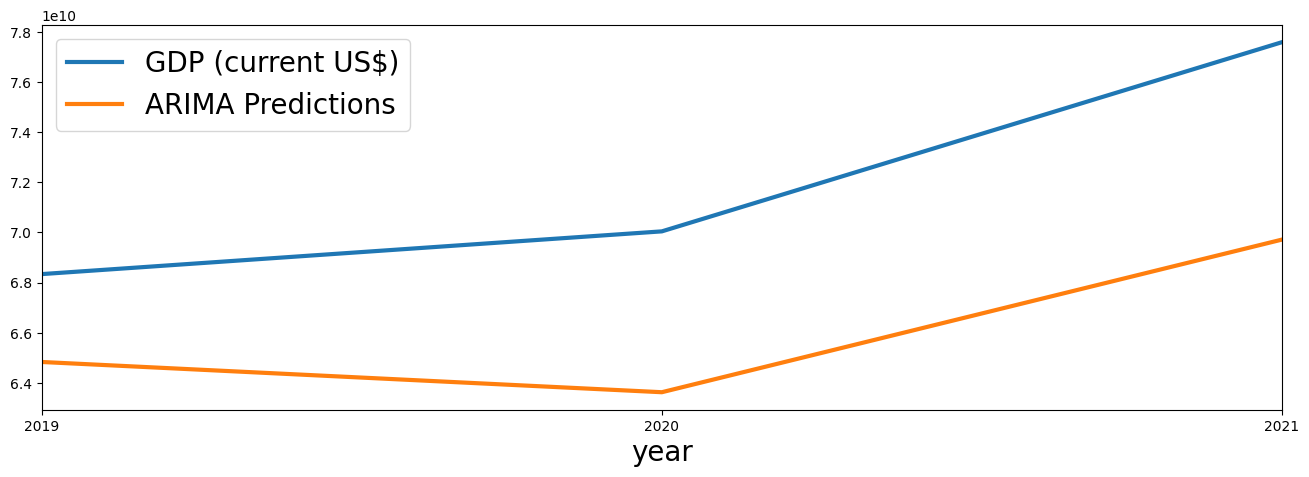

In [130]:
arima_pred = arima_model_fit.predict(start = len(train_df), end = len(df)-1, typ="levels").rename("ARIMA Predictions")

pred_df = pd.DataFrame(index=df.index)

pred_df["model_preds"] = arima_model_fit.predict(
    start=test_df.index[0], end=test_df.index[-1]
)


pred_df['GDP (current US$)'] = df['GDP (current US$)']
display(pred_df.iloc[-3:])

test_df['GDP (current US$)'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

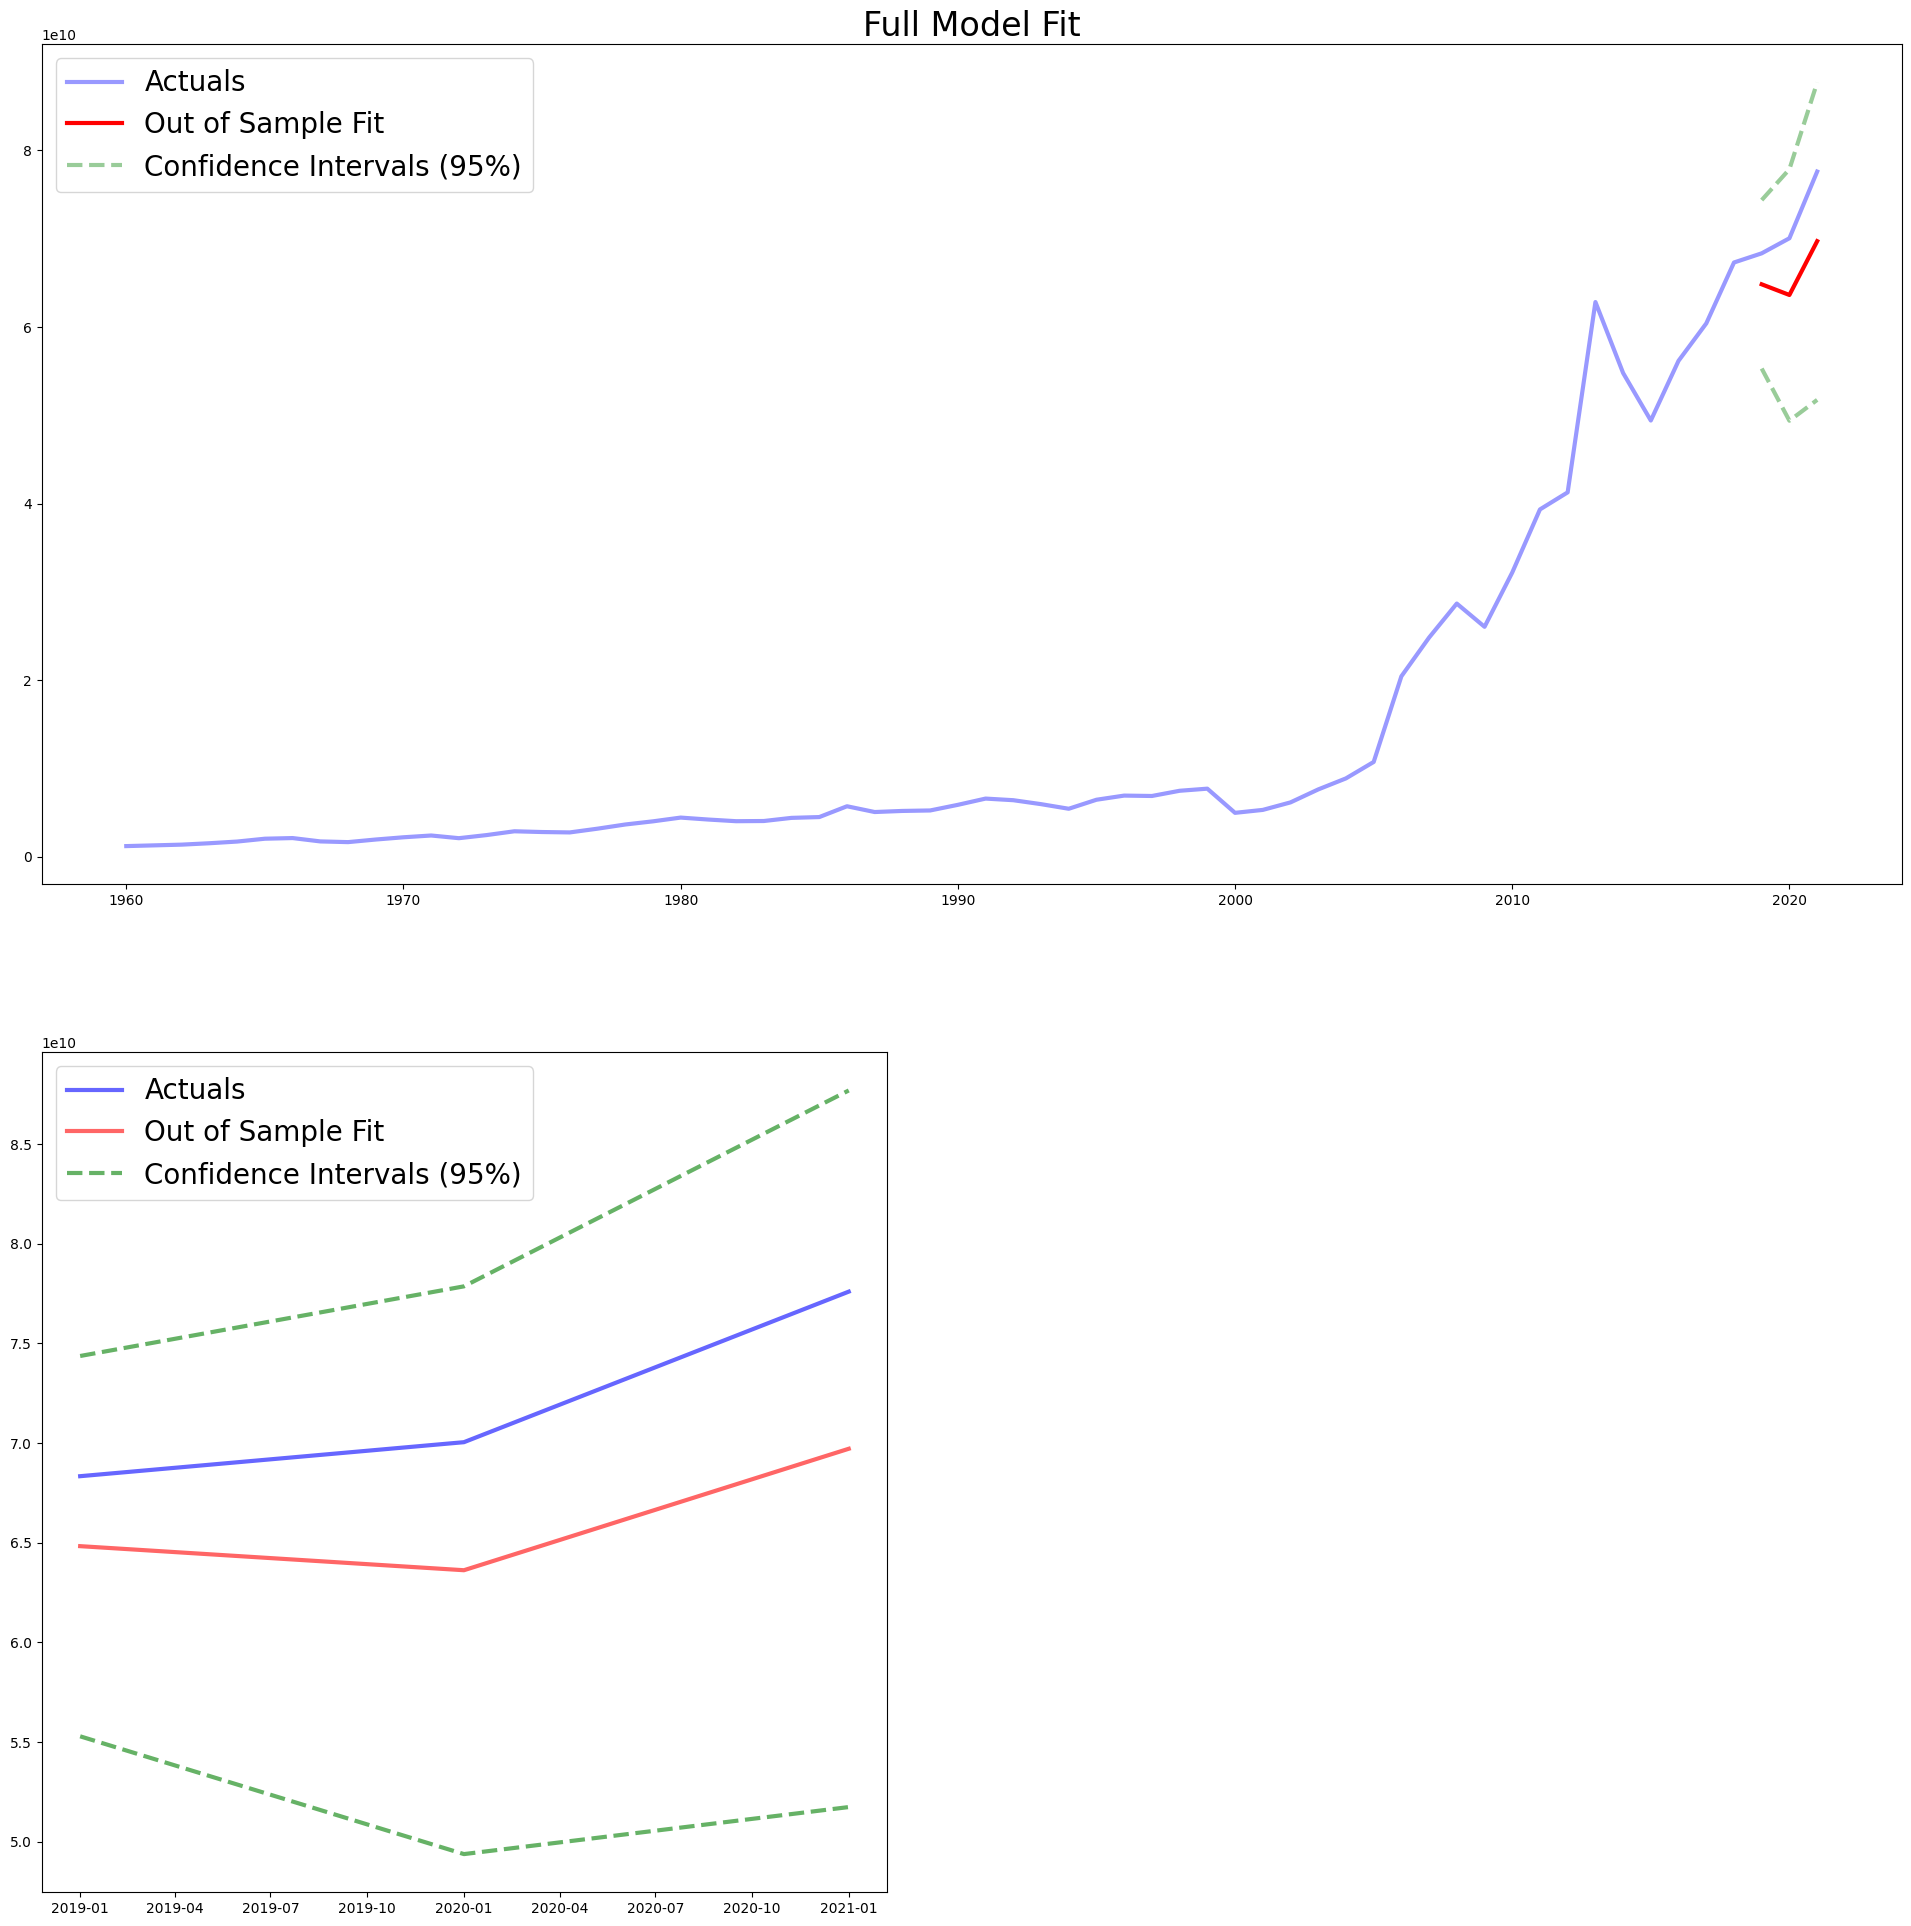

In [131]:
forecast = arima_model_fit.get_forecast(len(test_df.index))
forecast_df = forecast.conf_int(alpha=0.05)  # Confidence level of 95%



pred_df.at[test_df.index, "model_preds_lower"] = forecast_df["lower GDP (current US$)"]
pred_df.at[test_df.index, "model_preds_upper"] = forecast_df["upper GDP (current US$)"]

plt.rcParams["figure.figsize"] = 24, 24

ax = plt.subplot(2, 1, 1)
ax.plot(pred_df['GDP (current US$)'], color="blue", label="Actuals", alpha=0.4)

ax.plot(
    pred_df.loc[test_df.index]["model_preds"],
    color="red",
    linestyle="-",
    label="Out of Sample Fit",
)

ax.plot(
    pred_df.loc[test_df.index]["model_preds_lower"],
    color="green",
    linestyle="--",
    label="Confidence Intervals (95%)",
    alpha=0.4,
)

ax.plot(
    pred_df.loc[test_df.index]["model_preds_upper"],
    color="green",
    linestyle="--",
    alpha=0.4,
)

plt.title("Full Model Fit", size=24)
plt.legend()

ax1 = plt.subplot(2, 2, 3)

ax1.plot(
    pred_df.loc[test_df.index]['GDP (current US$)'], color="blue", label="Actuals", alpha=0.6
)

ax1.plot(
    pred_df.loc[test_df.index]["model_preds"],
    color="red",
    linestyle="-",
    label="Out of Sample Fit",
    alpha=0.6,
)

ax1.plot(
    pred_df.loc[test_df.index]["model_preds_lower"],
    color="green",
    linestyle="--",
    label="Confidence Intervals (95%)",
    alpha=0.6,
)

ax1.plot(
    pred_df.loc[test_df.index]["model_preds_upper"],
    color="green",
    linestyle="--",
    alpha=0.6,
)

ax1.legend()


plt.show()

Можно заметить, что вопреки нашему предположению о незначительном влиянии интерполяции на итоговый результат, модель претерпела довольно серьезные изменения в лучшую сторону.

Можно попробовать принудительно сгладить выброс в данных за 2013 год.

Посчитаем волатильность для нашего временного ряда.

In [69]:
df['GDP_vol'] = df['GDP (current US$)'].pct_change(1).mul(100).abs()
display(df['GDP_vol'].head())

year
1960-01-01          NaN
1961-01-01     6.789413
1962-01-01     6.357759
1963-01-01    11.448835
1964-01-01    12.363636
Name: GDP_vol, dtype: float64

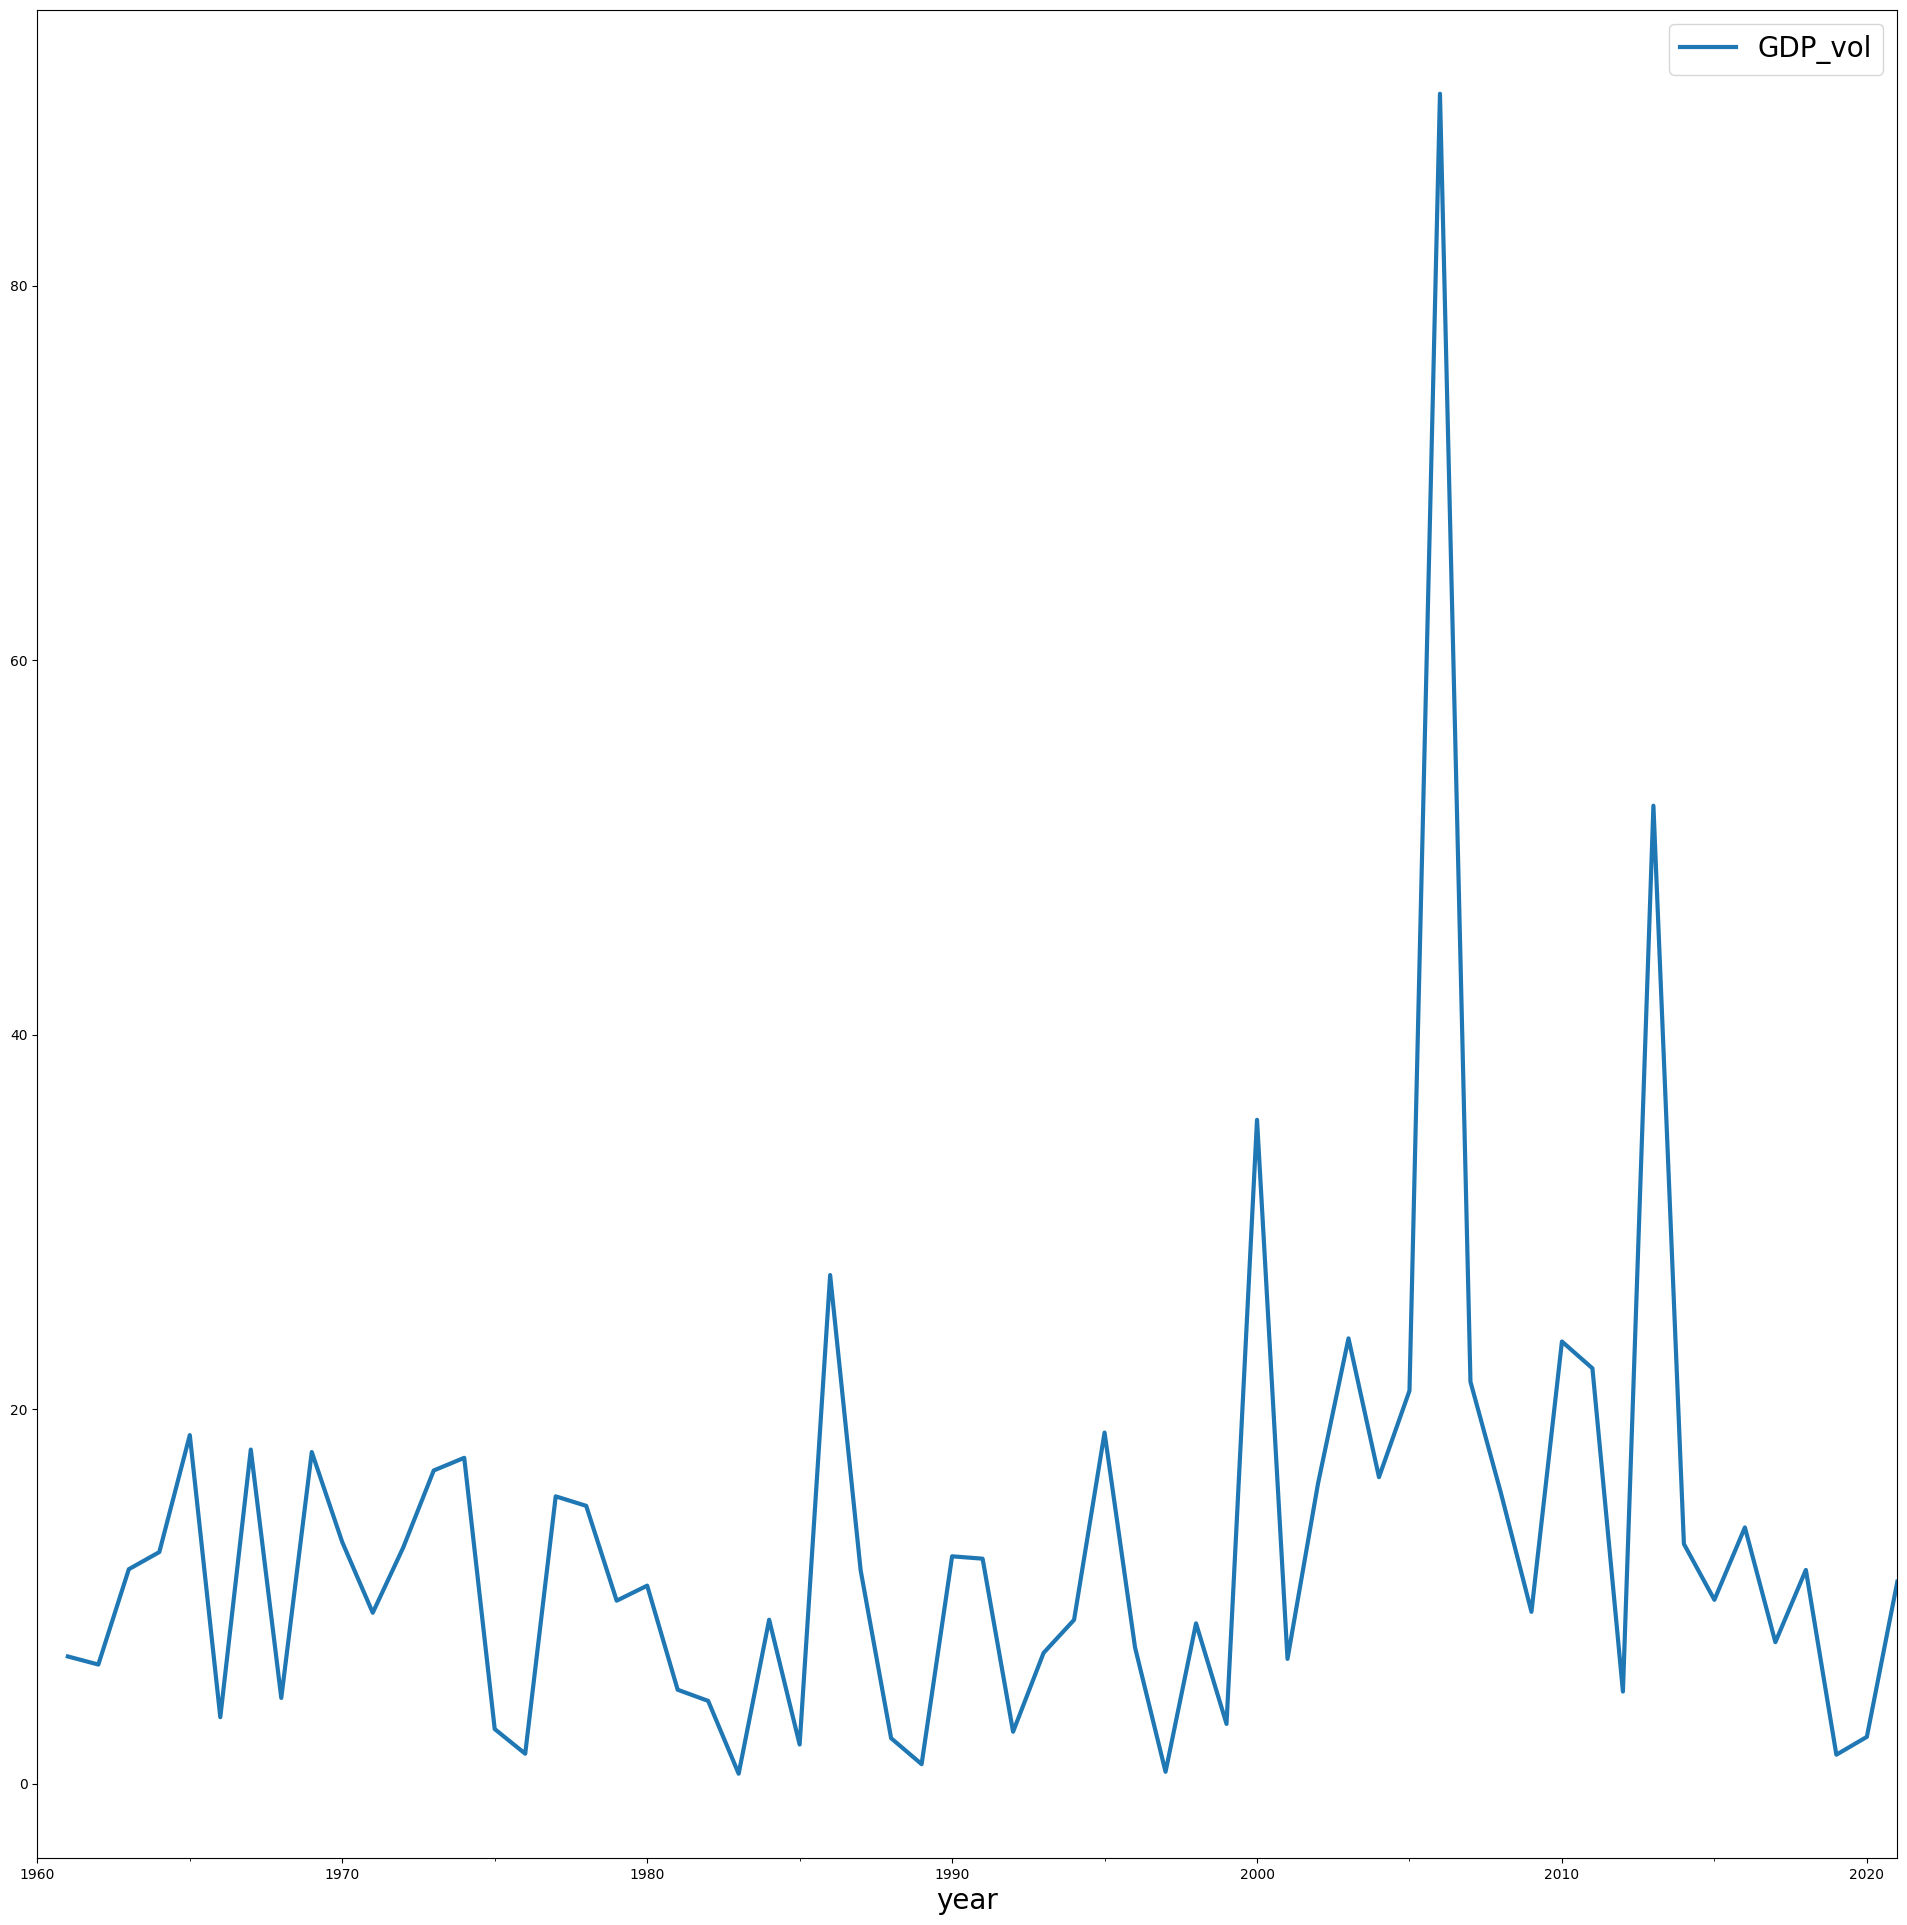

In [70]:
df['GDP_vol'].plot(legend='True')
plt.show()

У нас не очень много значений ряда, но, тем не менее, видно, что дисперсия сильно отлична от нуля, кроме того, имеется один явный пик.

adf:  -6.725311059553779
p-value:  3.4014596148856493e-09
Critical values:  {'1%': -3.5506699942762414, '5%': -2.913766394626147, '10%': -2.5946240473991997}
единичных корней нет, ряд стационарен


c:\python\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


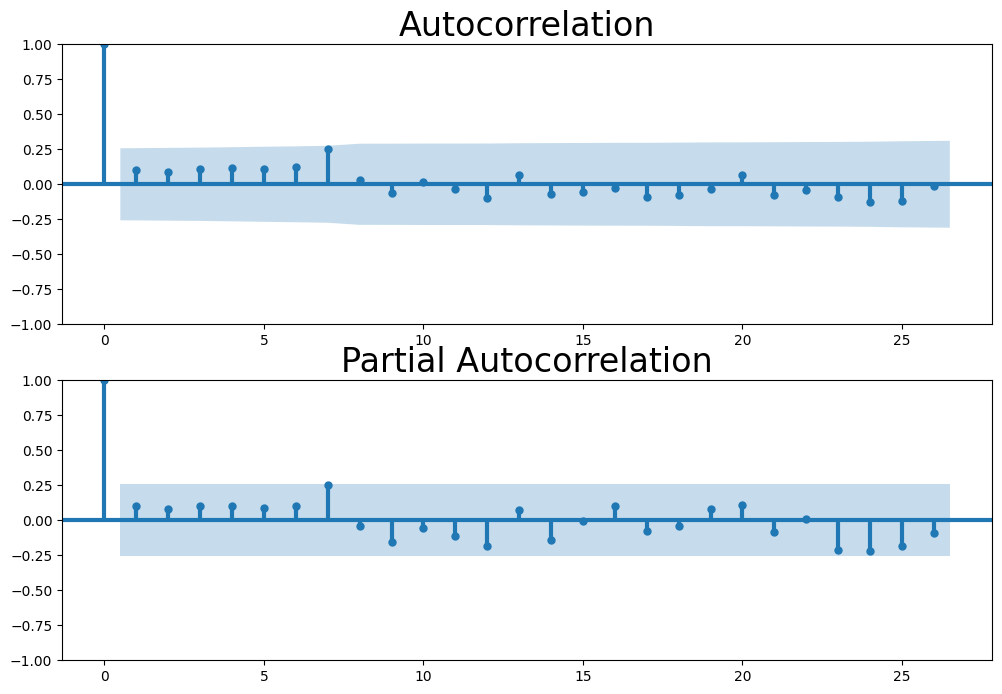

In [71]:
train_df = df.iloc[:-3]
test_df = df.iloc[-3:]

stat_test(train_df['GDP_vol'][1:])

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_df['GDP_vol'][1:], lags=26, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_df['GDP_vol'][1:], lags=26, ax=ax2)

По графикам получается, что в качестве p и q надо выбирать равными нулю, что невозможно. Попробуем рассмотреть варианты p=1, q=1 и p=7, q=7.

In [72]:
otg_diff = train_df.drop(columns= 'GDP (current US$)').diff(periods=1).dropna()
stat_test(otg_diff)

adf:  -5.507821854067955
p-value:  2.003291492058537e-06
Critical values:  {'1%': -3.5656240522121956, '5%': -2.920142229157715, '10%': -2.598014675124952}
единичных корней нет, ряд стационарен


Чтобы не загромождать проект, оставим только вариант p = 7, q = 7, т.к. он показал лучшие результаты по сравнению с другими (p = 1, q = 0 и p = 1, q = 1 и т.д.).<br />
Т.к. ряд стационарен, то d = 0.

In [73]:
p = 7
q = 7
d = 0

In [74]:
arima_model = ARIMA(train_df['GDP_vol'].dropna(), order=(p, d, q))
arima_model_fit = arima_model.fit()
arima_model_fit.summary()

c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\python\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
c:\python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\python\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-in

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                GDP_vol   No. Observations:                   58
Model:                 ARIMA(7, 0, 7)   Log Likelihood                -228.759
Date:                Thu, 21 Sep 2023   AIC                            489.517
Time:                        07:55:23   BIC                            522.484
Sample:                    01-01-1961   HQIC                           502.358
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.4778      6.972      1.933      0.053      -0.187      27.142
ar.L1          0.2156      1.991      0.108      0.914      -3.687       4.118
ar.L2         -0.0202      1.878     -0.011      0.991      -3.701       3.661
ar.L3          0.1759      1.762      0.100      0.920      -3.278       3.630
ar.L4         -0.0133      1.764     -0.008      0.994      -3.470       3.443
ar.L5         -0.5658      1.645     -0.344      0.731      -3.790       2.658
ar.L6          0.2960      2.156      0.137      0.891      -3.929       4.521
ar.L7         -0.0647      1.934     -0.033      0.973      -3.855       3.725
ma.L1         -0.1892      1.907     -0.099      0.921      -3.928       3.549
ma.L2          0.0781      1.845      0.042      0.966      -3.537       3.693
ma.L3         -0.1764      1.944     -0.091      0.928      -3.987       3.635
ma.L4          0.1565      1.793      0.087      0.930      -3.359       3.671
ma.L5          0.6740      1.600      0.421      0.674      -2.461       3.809
ma.L6         -0.2031      2.355     -0.086      0.931      -4.820       4.414
ma.L7          0.3456      2.063      0.168      0.867      -3.698       4.390
sigma2       150.1068     82.405      1.822      0.069     -11.403     311.617
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1122.92
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              12.27   Skew:                             3.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
smodel = pm.auto_arima(
    train_df['GDP_vol'],
    start_p=1,
    d=0,
    start_q=1,
    max_p=8,
    max_q=8,
    D=0,
    min_P=1,
    max_P=8,
    min_Q=1,
    max_Q=8,
    m=1,
    test="adf",
    error_action="ignore",
    stepwise=False,
    trace=True,
)

smodel.summary()

 ARIMA(0,0,0)(0,0,0)[1] intercept   : AIC=470.923, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[1] intercept   : AIC=472.429, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[1] intercept   : AIC=474.173, Time=0.05 sec
 ARIMA(0,0,3)(0,0,0)[1] intercept   : AIC=475.785, Time=0.07 sec
 ARIMA(0,0,4)(0,0,0)[1] intercept   : AIC=477.591, Time=0.10 sec
 ARIMA(0,0,5)(0,0,0)[1] intercept   : AIC=479.218, Time=0.09 sec
 ARIMA(1,0,0)(0,0,0)[1] intercept   : AIC=472.355, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[1] intercept   : AIC=472.628, Time=0.10 sec
 ARIMA(1,0,2)(0,0,0)[1] intercept   : AIC=474.489, Time=0.12 sec
 ARIMA(1,0,3)(0,0,0)[1] intercept   : AIC=476.045, Time=0.12 sec
 ARIMA(1,0,4)(0,0,0)[1] intercept   : AIC=477.150, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[1] intercept   : AIC=473.995, Time=0.07 sec
 ARIMA(2,0,1)(0,0,0)[1] intercept   : AIC=474.514, Time=0.12 sec
 ARIMA(2,0,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(2,0,3)(0,0,0)[1] intercept   : AIC=475.595, Time=0.16 sec
 ARIMA(3,0,0)(0,0,0)[1] inter

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   59
Model:                        SARIMAX   Log Likelihood                -233.462
Date:                Thu, 21 Sep 2023   AIC                            470.923
Time:                        07:55:25   BIC                            475.078
Sample:                    01-01-1960   HQIC                           472.545
                         - 01-01-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.4593      3.155      4.265      0.000       7.275      19.644
sigma2       183.5567     20.038      9.161      0.000     144.283     222.830
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):               796.69
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):              13.07   Skew:                             3.55
Prob(H) (two-sided):                  0.00   Kurtosis:                        19.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Поиск оптимальных параметров вернул значения p = 0 и q = 0, но модель требует p > 0. Выше уже говорилось о том, что наиболее оптимальными являются параметры p = 7 и q = 7.

In [76]:
from arch import arch_model

garch_df = pd.DataFrame(df['GDP_vol'].loc[df.index])

garch_df.loc[train_df.index, 'GDP_vol'] = train_df['GDP_vol'].dropna()

model = arch_model(garch_df['GDP_vol'].dropna(), p=7, q=7, vol='GARCH')

model_results = model.fit(last_obs=test_df.index[0], update_freq=5)


Iteration:      5,   Func. Count:     91,   Neg. LLF: 234.38048115955718
Iteration:     10,   Func. Count:    179,   Neg. LLF: 214.61759052175603
Iteration:     15,   Func. Count:    265,   Neg. LLF: 214.40871495512866
Iteration:     20,   Func. Count:    350,   Neg. LLF: 214.10079395318482
Iteration:     25,   Func. Count:    435,   Neg. LLF: 214.01143994526097
Optimization terminated successfully    (Exit mode 0)
            Current function value: 214.00780231871062
            Iterations: 29
            Function evaluations: 492
            Gradient evaluations: 28


In [77]:
model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                GDP_vol   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -214.008
Distribution:                  Normal   AIC:                           460.016
Method:            Maximum Likelihood   BIC:                           492.983
                                        No. Observations:                   58
Date:                Thu, Sep 21 2023   Df Residuals:                       57
Time:                        07:55:25   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            11.8666      1.572      7.550  4.349e-14 [  8.786, 14.947]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega         44.1055     42.301      1.043      0.297    [-38.802,1.270e+02]
alpha[1]   3.2351e-08  7.767e-02  4.165e-07      1.000      [ -0.152,  0.152]
alpha[2]   7.8463e-08  2.299e-02  3.412e-06      1.000 [-4.507e-02,4.507e-02]
alpha[3]   6.5621e-14  6.853e-02  9.576e-13      1.000      [ -0.134,  0.134]
alpha[4]   3.6162e-03  1.492e-02      0.242      0.809 [-2.563e-02,3.286e-02]
alpha[5]   6.2496e-14  1.274e-02  4.906e-12      1.000 [-2.497e-02,2.497e-02]
alpha[6]       0.7319      0.915      0.800      0.424      [ -1.062,  2.525]
alpha[7]       0.1024      0.643      0.159      0.873      [ -1.157,  1.362]
beta[1]    5.7084e-07      0.501  1.139e-06      1.000      [ -0.982,  0.982]
beta[2]    3.6496e-07  6.190e-02  5.896e-06      1.000      [ -0.121,  0.121]
beta[3]    3.4349e-07  2.869e-02  1.197e-05      1.000 [-5.624e-02,5.624e-02]
beta[4]    3.0295e-07  9.122e-02  3.321e-06      1.000      [ -0.179,  0.179]
beta[5]    1.7888e-05  5.268e-02  3.396e-04      1.000      [ -0.103,  0.103]
beta[6]    3.6179e-07  3.014e-02  1.200e-05      1.000 [-5.908e-02,5.908e-02]
beta[7]    2.9083e-07      1.155  2.517e-07      1.000      [ -2.265,  2.265]
=============================================================================

Covariance estimator: robust
"""

Для значений p = 7 и q = 7 AIC = 460.016, что меньше, чем значение AIC = 470.923, полученное при параметрах p = 0 и q = 0.

In [78]:
predictions_df = test_df.copy()

predictions_df["Predictions"] = model_results.forecast(reindex = False).variance.loc[
    test_df.index
]

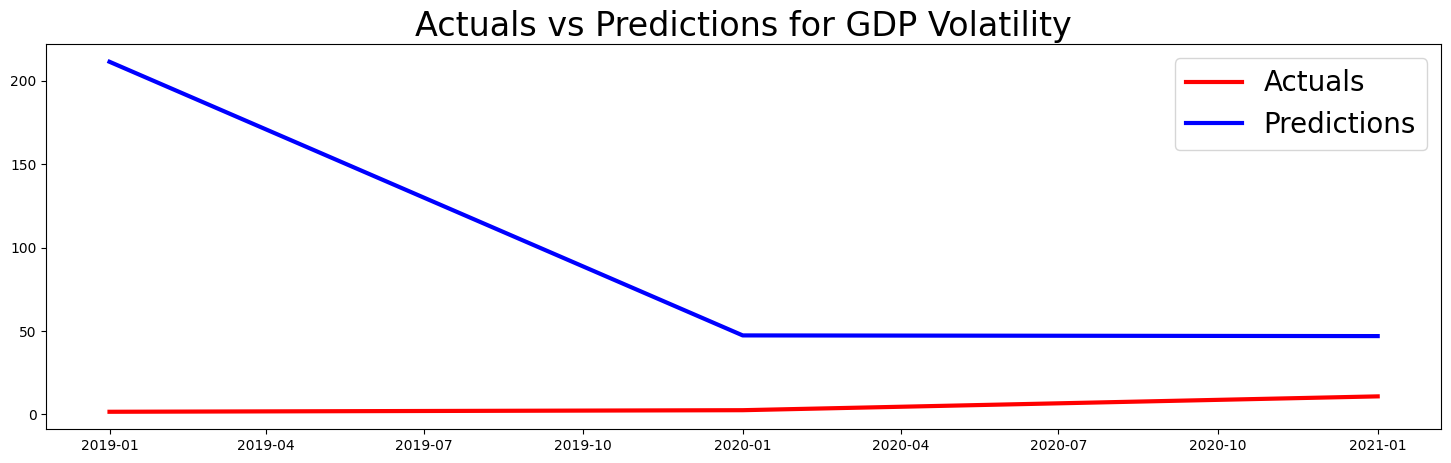

In [91]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = 18, 5

ax.plot(predictions_df['GDP_vol'].abs(), color='red', label = 'Actuals')
ax.plot(predictions_df["Predictions"], color='blue', label = 'Predictions')

legend = ax.legend()
plt.title("Actuals vs Predictions for GDP Volatility", size=24)

plt.show()

In [92]:
from sklearn.metrics import mean_squared_error

mean_squared_error(
    predictions_df['GDP_vol'].abs(), predictions_df["Predictions"]
)

15799.81566534356

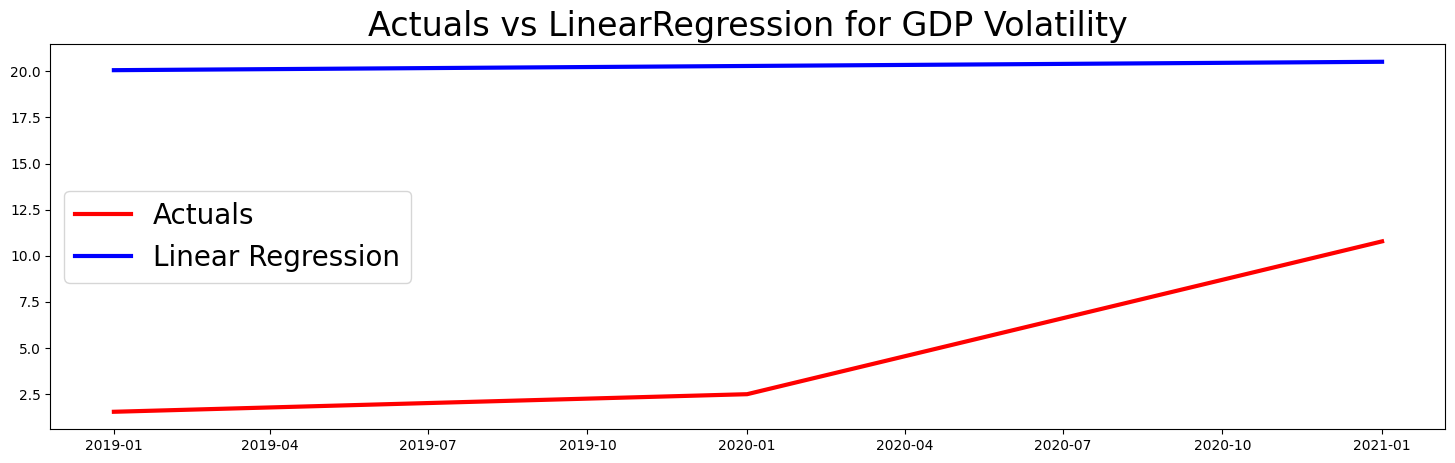

In [98]:
from sklearn.linear_model import LinearRegression

X_train = pd.DataFrame(range(df['GDP_vol'].shape[0]))[
    : train_df.shape[0]
].fillna(0)
X_test = pd.DataFrame(range(df['GDP_vol'].shape[0]))[
    train_df.shape[0] :
].fillna(0)
y_train = train_df['GDP_vol'].fillna(0)
y_test = test_df['GDP_vol'].fillna(0)


lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)


plt.plot(y_test, color='red', label = 'Actuals')
plt.plot(pd.Series(lr_predict, index=y_test.index), color='blue', label = 'Linear Regression')
legend = plt.legend(loc='center left')
plt.title("Actuals vs LinearRegression for GDP Volatility", size=24)
plt.show()

Линейная регрессия не смогла уловить дисперсию, это же можно отнести и к модели GARCH. Такой результат связан, скорее всего с тем, что тестовая выборка мала (данные всего за три года).<br />
С помощью модели ARIMA с парамертами p = 2, q = 1 и d = 3 (AIC = 2659.231) удалось получить предсказание, попадающее в 95% доверительный интервал. Применение интерполяции не сильно повлияло на AIC (AIC = 2659.226), но на графике предсказание выглядит более точным.<br />
Предсказание волатильности с помощью GARCH-модели и линейной регрессии не принесло удовлетворительных результатов, что объясняется, скорее всего особенностями самого исследуемого ряда.